In [1]:
EXPERIMENT_NOTEBOOK_PATH = "../../reports/experiments/2019-02-07_00-21/notebook.csv"


In [2]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Load

In [3]:
exp_df = pd.read_csv(EXPERIMENT_NOTEBOOK_PATH)
exp_df.head()

acc   loss  val_acc  val_loss  trial_no       aug1_type  aug1_magnitude  \
0  0.112  2.308    0.167     2.279         1  coarse-dropout           0.844   
1  0.145  2.279    0.195     2.224         1  coarse-dropout           0.844   
2  0.171  2.219    0.175     2.175         1  coarse-dropout           0.844   
3  0.181  2.187    0.133     2.270         1  coarse-dropout           0.844   
4  0.217  2.165    0.213     2.133         1  coarse-dropout           0.844   

  aug2_type  aug2_magnitude  portion  sample_no  mean_late_val_acc  epoch  
0       fog           0.847    0.624          1              0.414      1  
1       fog           0.847    0.624          1              0.414      2  
2       fog           0.847    0.624          1              0.414      3  
3       fog           0.847    0.624          1              0.414      4  
4       fog           0.847    0.624          1              0.414      5

## Preprocess

### correct name of reward

In [4]:
exp_df.rename(columns={"mean_late_val_acc":"reward"}, inplace=True)
exp_df.head()

acc   loss  val_acc  val_loss  trial_no       aug1_type  aug1_magnitude  \
0  0.112  2.308    0.167     2.279         1  coarse-dropout           0.844   
1  0.145  2.279    0.195     2.224         1  coarse-dropout           0.844   
2  0.171  2.219    0.175     2.175         1  coarse-dropout           0.844   
3  0.181  2.187    0.133     2.270         1  coarse-dropout           0.844   
4  0.217  2.165    0.213     2.133         1  coarse-dropout           0.844   

  aug2_type  aug2_magnitude  portion  sample_no  reward  epoch  
0       fog           0.847    0.624          1   0.414      1  
1       fog           0.847    0.624          1   0.414      2  
2       fog           0.847    0.624          1   0.414      3  
3       fog           0.847    0.624          1   0.414      4  
4       fog           0.847    0.624          1   0.414      5

### add epoch info and accuracy overfit

In [5]:
n_epochs = len(exp_df) / len(exp_df["trial_no"].unique()) / len(exp_df["sample_no"].unique())
exp_df["epoch"] = exp_df.index % n_epochs
exp_df["acc_overfit"] = exp_df["acc"] - exp_df["val_acc"]
exp_df.head()

acc   loss  val_acc  val_loss  trial_no       aug1_type  aug1_magnitude  \
0  0.112  2.308    0.167     2.279         1  coarse-dropout           0.844   
1  0.145  2.279    0.195     2.224         1  coarse-dropout           0.844   
2  0.171  2.219    0.175     2.175         1  coarse-dropout           0.844   
3  0.181  2.187    0.133     2.270         1  coarse-dropout           0.844   
4  0.217  2.165    0.213     2.133         1  coarse-dropout           0.844   

  aug2_type  aug2_magnitude  portion  sample_no  reward  epoch  acc_overfit  
0       fog           0.847    0.624          1   0.414    0.0       -0.055  
1       fog           0.847    0.624          1   0.414    1.0       -0.050  
2       fog           0.847    0.624          1   0.414    2.0       -0.004  
3       fog           0.847    0.624          1   0.414    3.0        0.048  
4       fog           0.847    0.624          1   0.414    4.0        0.004

## Some info

In [6]:
print (f"number of trials:{exp_df.trial_no.unique().__len__()}")
print (f"number of samples for each trial:{exp_df.sample_no.unique().__len__()}")

number of trials:500
number of samples for each trial:3


In [24]:
color_palette = ["red","blue","chocolate","salmon","green","pink","orange",
                 "purple","magenta","sienna","teal","khaki","yellow","darkgreen",
                 "darkblue", "cyan","tan","yellowgreen","tomato","olive",
                 "navy","ivory","brown","azure", '#e6194b', '#3cb44b', '#ffe119', '#4363d8', 
                 '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', 
                 '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
                 '#000075', '#808080', '#ffffff', '#000000']*300

def plot_exp_lines(exp_df, plot=True):
    
    #plt.figure(figsize=(20,10))
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,15))
    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.0)
    
    rowList = []
    for trial_no in exp_df["trial_no"].unique():
        
        if trial_no<1:
            continue
        
        iter_df = exp_df[exp_df["trial_no"]==trial_no].copy()
        
        exp_color = color_palette[trial_no]
        
        if exp_df[exp_df["trial_no"]==trial_no]["portion"].values[0]==0.0:
            exp_color="black"
        
        mean_last_scores = []
        
        if plot==True:
            ############################################################
            # Accuracy plot
            ############################################################
            for sample_id in iter_df["sample_no"].unique():
                sample_df = iter_df[iter_df["sample_no"]==sample_id].copy()
                xs = np.arange(1,61,1)
                axes[0].plot(xs, sample_df["val_acc"], color=exp_color, alpha=0.5, linewidth=2)
                axes[0].plot(xs, sample_df["acc"], '--',color=exp_color, alpha=0.5, linewidth=1)

            axes[0].set_title("validation (straight) and train (dashed) accuracies for child model\n"+\
                      "(each color represents a distinct augmentation strategy) ", fontsize=20)
            axes[0].set_ylabel("accuracy", fontsize=20)

            ############################################################
            # Loss plot
            ############################################################
            for sample_id in iter_df["sample_no"].unique():
                sample_df = iter_df[iter_df["sample_no"]==sample_id].copy()
                xs = np.arange(1,61,1)
                axes[1].plot(xs, sample_df["val_loss"], color=exp_color, alpha=0.5, linewidth=2)
                axes[1].plot(xs, sample_df["loss"], '--',color=exp_color, alpha=0.5, linewidth=1)

            #axes[1].title("validation (straight) and train (dashed) accuracies for child model\n"+\
            #          "(each color represents a distinct augmentation strategy) ", fontsize=20)
            axes[1].set_xlabel("epochs", fontsize=20)
            axes[1].set_ylabel("loss", fontsize=20)
            
        param1 = iter_df["aug1_type"].values[0]
        param2 = iter_df["aug1_magnitude"].values[0]
        param3 = iter_df["aug2_type"].values[0]
        param4 = iter_df["aug2_magnitude"].values[0]
        portion = iter_df["portion"].values[0]
        reward = iter_df["reward"].values[0]
        
        rowList.append([trial_no,param1,param2,param3,param4,portion,reward])
        
    ret_df = pd.DataFrame(rowList, columns=[
        "trial_no","aug1_type","aug1_magnitude", "aug2_type","aug2_magnitude","portion", "reward"]) 
    return ret_df.sort_values("reward", ascending=False)

Total number of trials: 500


trial_no       aug1_type  aug1_magnitude                  aug2_type  \
365       366            crop           0.764                     emboss   
392       393  gamma-contrast           0.000  add-to-hue-and-saturation   
160       161            crop           0.970  add-to-hue-and-saturation   
262       263            crop           0.902              gaussian-blur   
181       182            crop           0.910              gaussian-blur   
242       243  gamma-contrast           0.144                     rotate   
177       178            crop           0.815                       crop   
258       259            crop           0.982             gamma-contrast   
170       171            crop           0.904                     clouds   
220       221  gamma-contrast           0.005                     invert   

     aug2_magnitude  portion  reward  
365           0.006    0.760   0.500  
392           0.827    0.902   0.500  
160           0.904    0.639   0.497  
262           0.858    0.831   0.497  
181           0.963    0.903   0.496  
242           0.861    0.713   0.495  
177           0.961    0.764   0.492  
258           0.856    0.993   0.492  
170           0.906    0.781   0.491  
220           0.357    0.992   0.490

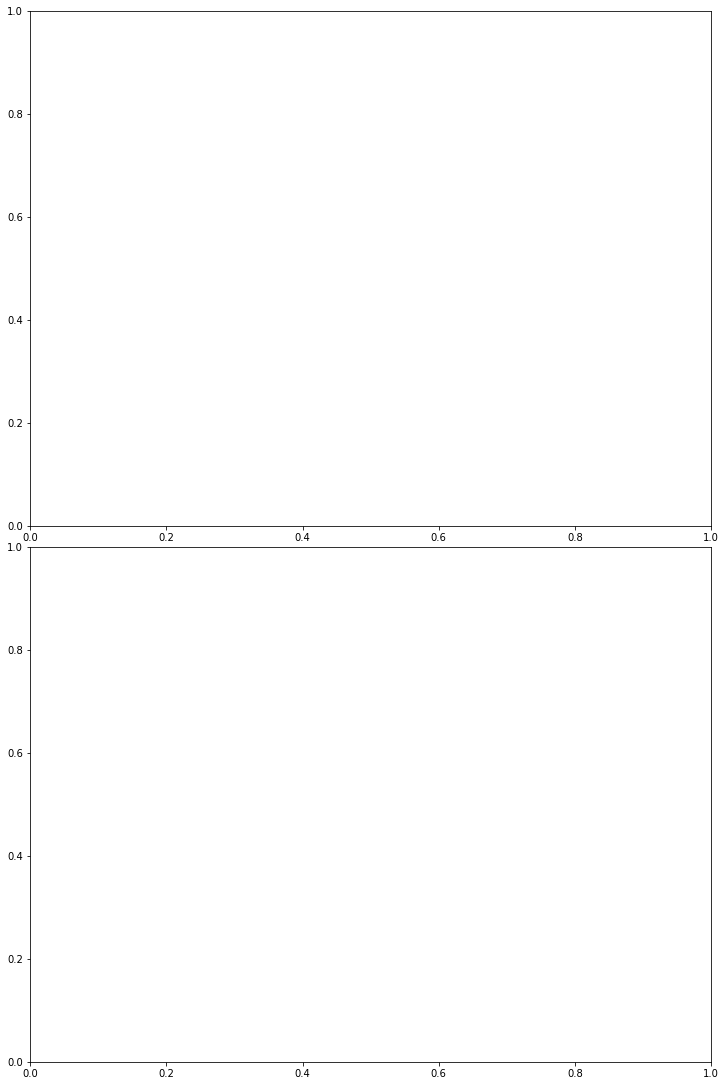

In [25]:
score_df = plot_exp_lines(exp_df, plot=False)
print (f"Total number of trials: {exp_df.trial_no.unique().__len__()}")
score_df[:10]

## Rewards trend

/Users/baris.ozmen/miniconda3/envs/insight/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


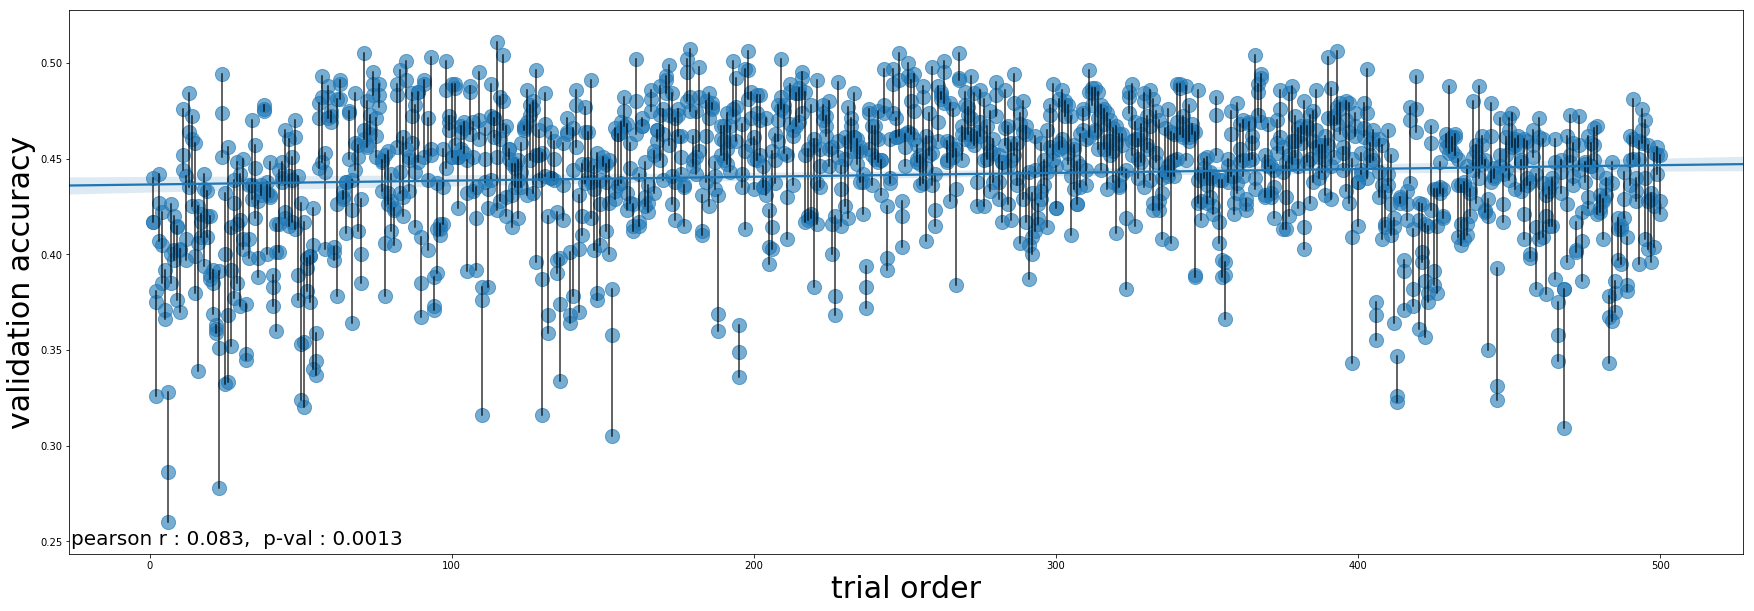

In [13]:
import seaborn as sns

df = (exp_df[exp_df["acc_overfit"]<0.05]
     .sort_values("val_acc", ascending=False)
     .drop_duplicates(["trial_no","sample_no"])
)[["trial_no","val_acc"]]

plt.figure(figsize=(30,10))
for trial_no in df["trial_no"].unique():
    val_accs = df[df["trial_no"]==trial_no]["val_acc"].values
    plt.plot([trial_no, trial_no],[min(val_accs), max(val_accs)], color='black', alpha=0.8)

ax = sns.regplot(x="trial_no", y="val_acc", data=df, scatter_kws={'s':200,'alpha':0.6})

from scipy.stats import pearsonr
r , p = pearsonr(df["trial_no"].values,df["val_acc"].values)

plt.text(plt.xlim()[0]+0.5,plt.ylim()[0]+0.005, f"pearson r : {r:.2},  p-val : {p:.2}", fontsize=20)

plt.xlabel("trial order", fontsize=30)
plt.ylabel("validation accuracy", fontsize=30)

del df

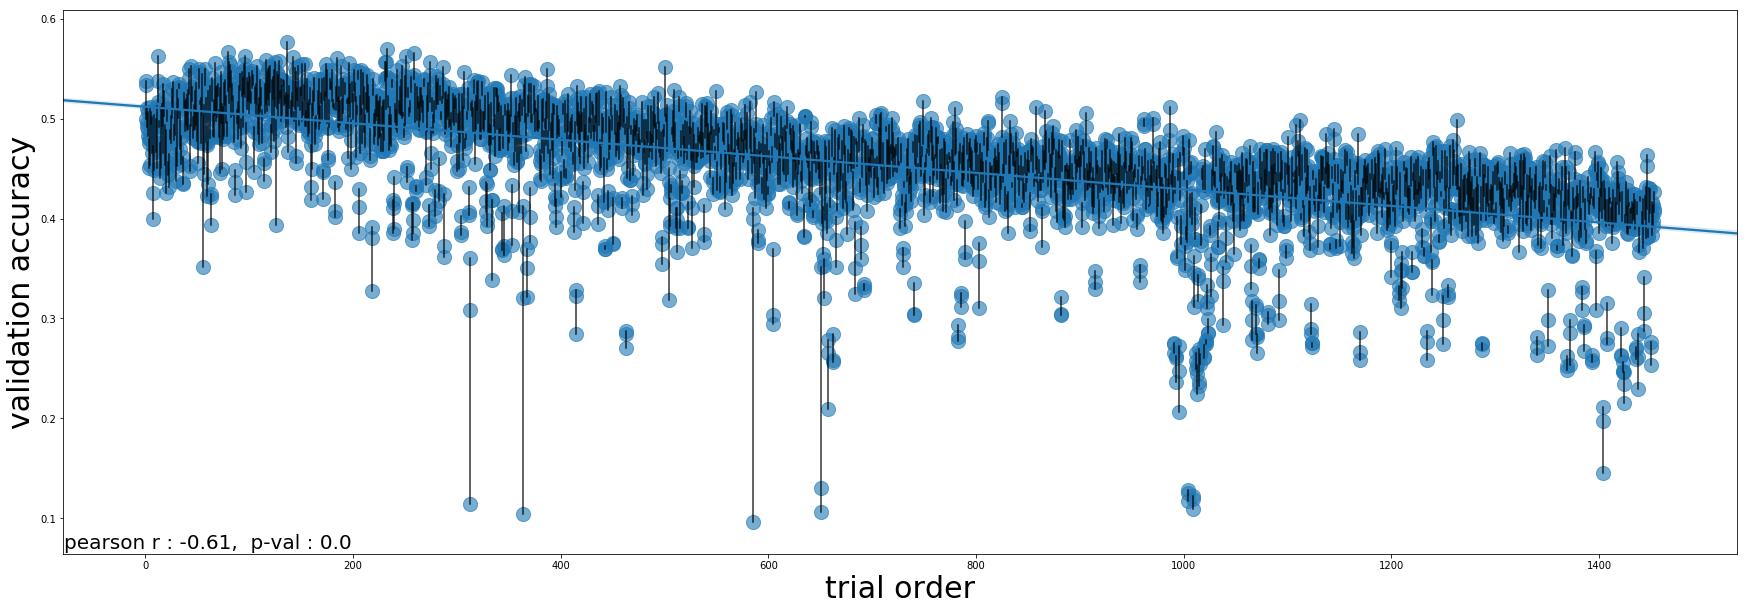

In [27]:
import seaborn as sns

df = (exp_df[exp_df["acc_overfit"]<0.05]
     .sort_values("val_acc", ascending=False)
     .drop_duplicates(["trial_no","sample_no"])
)[["trial_no","val_acc"]]

plt.figure(figsize=(30,10))
for trial_no in df["trial_no"].unique():
    val_accs = df[df["trial_no"]==trial_no]["val_acc"].values
    plt.plot([trial_no, trial_no],[min(val_accs), max(val_accs)], color='black', alpha=0.8)

ax = sns.regplot(x="trial_no", y="val_acc", data=df, scatter_kws={'s':200,'alpha':0.6})

from scipy.stats import pearsonr
r , p = pearsonr(df["trial_no"].values,df["val_acc"].values)

plt.text(plt.xlim()[0]+0.5,plt.ylim()[0]+0.005, f"pearson r : {r:.2},  p-val : {p:.2}", fontsize=20)

plt.xlabel("trial order", fontsize=30)
plt.ylabel("validation accuracy", fontsize=30)

del df

## How frequency of augmented images affect accuracy?

Text(0, 0.5, 'val_acc')

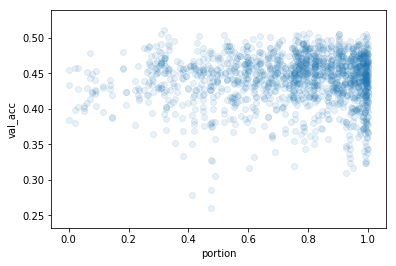

In [14]:
df = (exp_df[exp_df["acc_overfit"]<0.05]
         .sort_values("val_acc", ascending=False)
         .drop_duplicates(["trial_no","sample_no"])
     )[["portion","val_acc"]]

plt.scatter(df["portion"], df["val_acc"], alpha=0.1)
plt.xlabel("portion")
plt.ylabel("val_acc")

In [15]:
from scipy.stats import pearsonr

pearsonr(df["portion"], df["val_acc"])

(0.034543394759591464, 0.18117574751029183)

In [16]:
exp_df.drop_duplicates("trial_no")["portion"].unique().__len__()

329

# Top 5 policy accuracy curves (they're overfitting for augmentation)

trial_no       aug1_type  aug1_magnitude                  aug2_type  \
3       366            crop           0.764                     emboss   
4       393  gamma-contrast           0.000  add-to-hue-and-saturation   
0       161            crop           0.970  add-to-hue-and-saturation   
2       263            crop           0.902              gaussian-blur   
1       182            crop           0.910              gaussian-blur   

   aug2_magnitude  portion  reward  
3           0.006    0.760   0.500  
4           0.827    0.902   0.500  
0           0.904    0.639   0.497  
2           0.858    0.831   0.497  
1           0.963    0.903   0.496

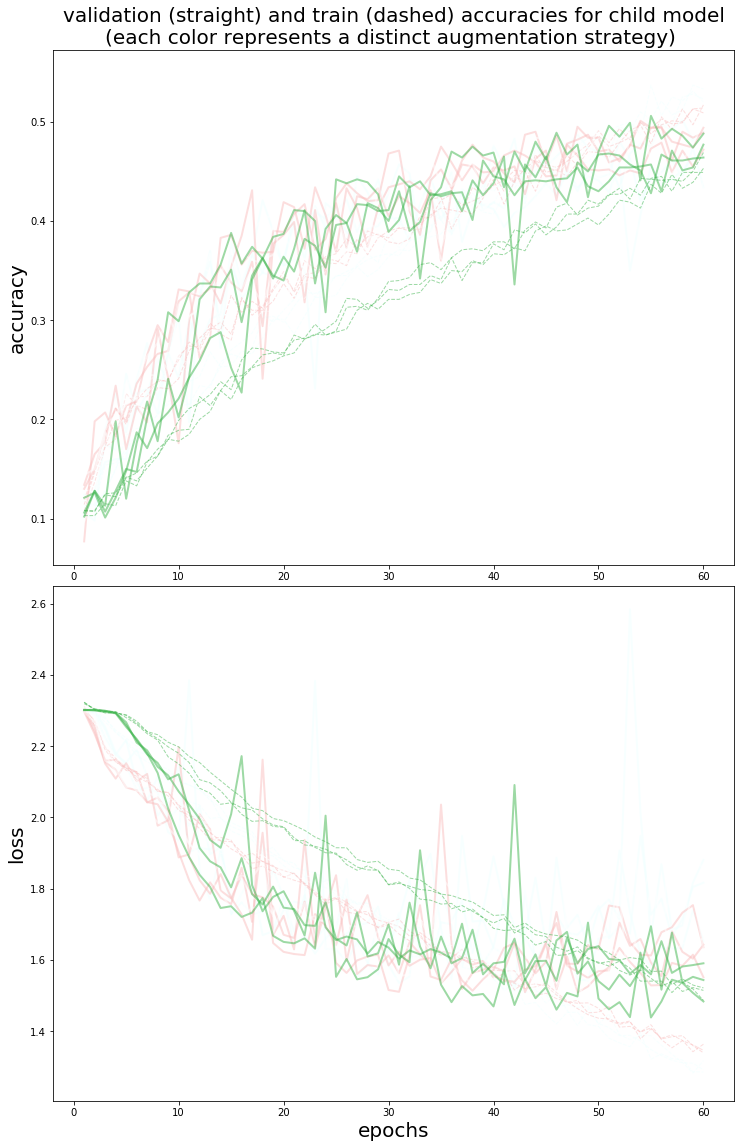

In [26]:
top_policy_trial_no_arr = score_df[:5].trial_no.values
plot_exp_lines(exp_df[exp_df["trial_no"].isin(top_policy_trial_no_arr)])

# Bottom 5 policy accuracy curves

trial_no    aug1_type  aug1_magnitude       aug2_type  aug2_magnitude  \
2        32      dropout           0.137         sharpen           0.786   
0         2      sharpen           0.298            crop           0.273   
3        50  translate-y           0.004        brighten           0.188   
4       153      dropout           0.009  coarse-dropout           0.091   
1         6      dropout           0.537        brighten           0.106   

   portion  reward  
2    0.925   0.289  
0    0.478   0.288  
3    0.988   0.272  
4    0.488   0.271  
1    0.474   0.243

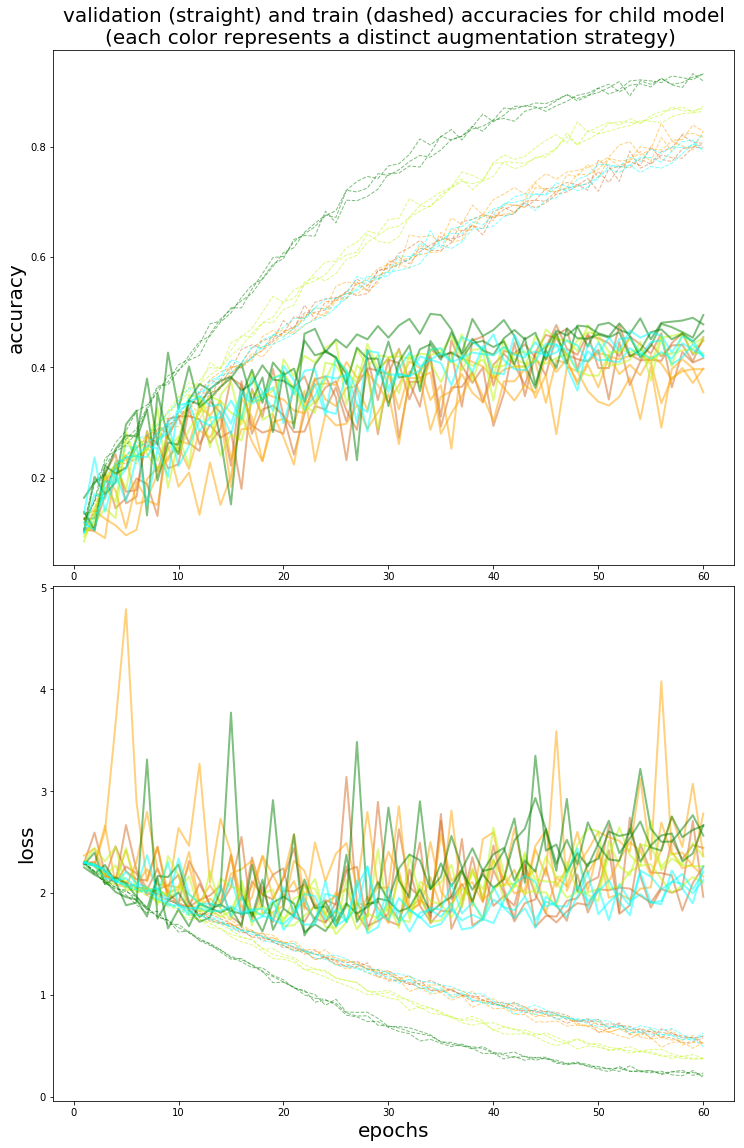

In [27]:
worst_policy_trial_no_arr = score_df[-5:].trial_no.values
plot_exp_lines(exp_df[exp_df["trial_no"].isin(worst_policy_trial_no_arr)])

In [35]:
import sys
sys.path.insert(0,"../../")

from deepaugment.augmenter import Augmenter
augmenter=Augmenter()

In [37]:
from PIL import Image

from imgaug import augmenters as iaa

import sys
sys.path.insert(0,"../../")
from deepaugment.build_features import DataOp

Using TensorFlow backend.


In [38]:
data, input_shape = DataOp.load("cifar10",1000)
data = DataOp.preprocess(data)

Using 1000 training images


In [48]:
def display_images(X, nrows=2, ncols=4):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10,nrows*10))
    fig.tight_layout()

    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        axes[int(i/ncols)][i%ncols].imshow(im_arr)
        
def display_images_comperatively(X,X_aug,nrows=2, ncols=4):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10,nrows*10))
    fig.tight_layout()

    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        if i%2==0:
            axes[int(i/ncols)][i%ncols].imshow(X[i])
            axes[int((i+1)/ncols)][(i+1)%ncols].imshow(X_aug[i])

            
def display_augmentation_by_trial_no(trial_no, exp_df, data, nrows=2, ncols=4):
    trial_df = exp_df[exp_df["trial_no"]==trial_no]
    trial_hyperparams = [trial_df.iloc[0,5],trial_df.iloc[0,6],
                         trial_df.iloc[0,7],trial_df.iloc[0,8],
                         1.0] # proportion always 1

    aug_data = augmenter.run(data["X_train"], data["y_train"],*trial_hyperparams)

    print (trial_hyperparams)
    display_images_comperatively(data["X_train"], aug_data["X_train"], nrows, ncols)
    
def display_augmentation_by_steps(trial_no, df, data, nrows=4):
    from deepaugment.augmenter import transform
    trial_df = df[df["trial_no"]==trial_no]
    
    hyperparams = [trial_df.iloc[0,5],trial_df.iloc[0,6],
                   trial_df.iloc[0,7],trial_df.iloc[0,8],
                   trial_df.iloc[0,9],trial_df.iloc[0,10],
                   1.0] # proportion always 1
    
    X = data["X_train"]
    X_aug_1 = transform(hyperparams[0], hyperparams[1], X)
    X_aug_2 = transform(hyperparams[2], hyperparams[3], X_aug_1)
    
    ncols=4
    fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(ncols*10,nrows*10))
    fig.tight_layout()
    fig.suptitle("smt")
    
    for i,im_arr in enumerate(X[:(nrows*ncols)]):
        if i%4==0:
            axes[int(i/ncols)][i%ncols].imshow(X[i])
            axes[int((i+1)/ncols)][(i+1)%ncols].imshow(X_aug_1[i])
            axes[int((i+2)/ncols)][(i+2)%ncols].imshow(X_aug_2[i])
    
    print (hyperparams)

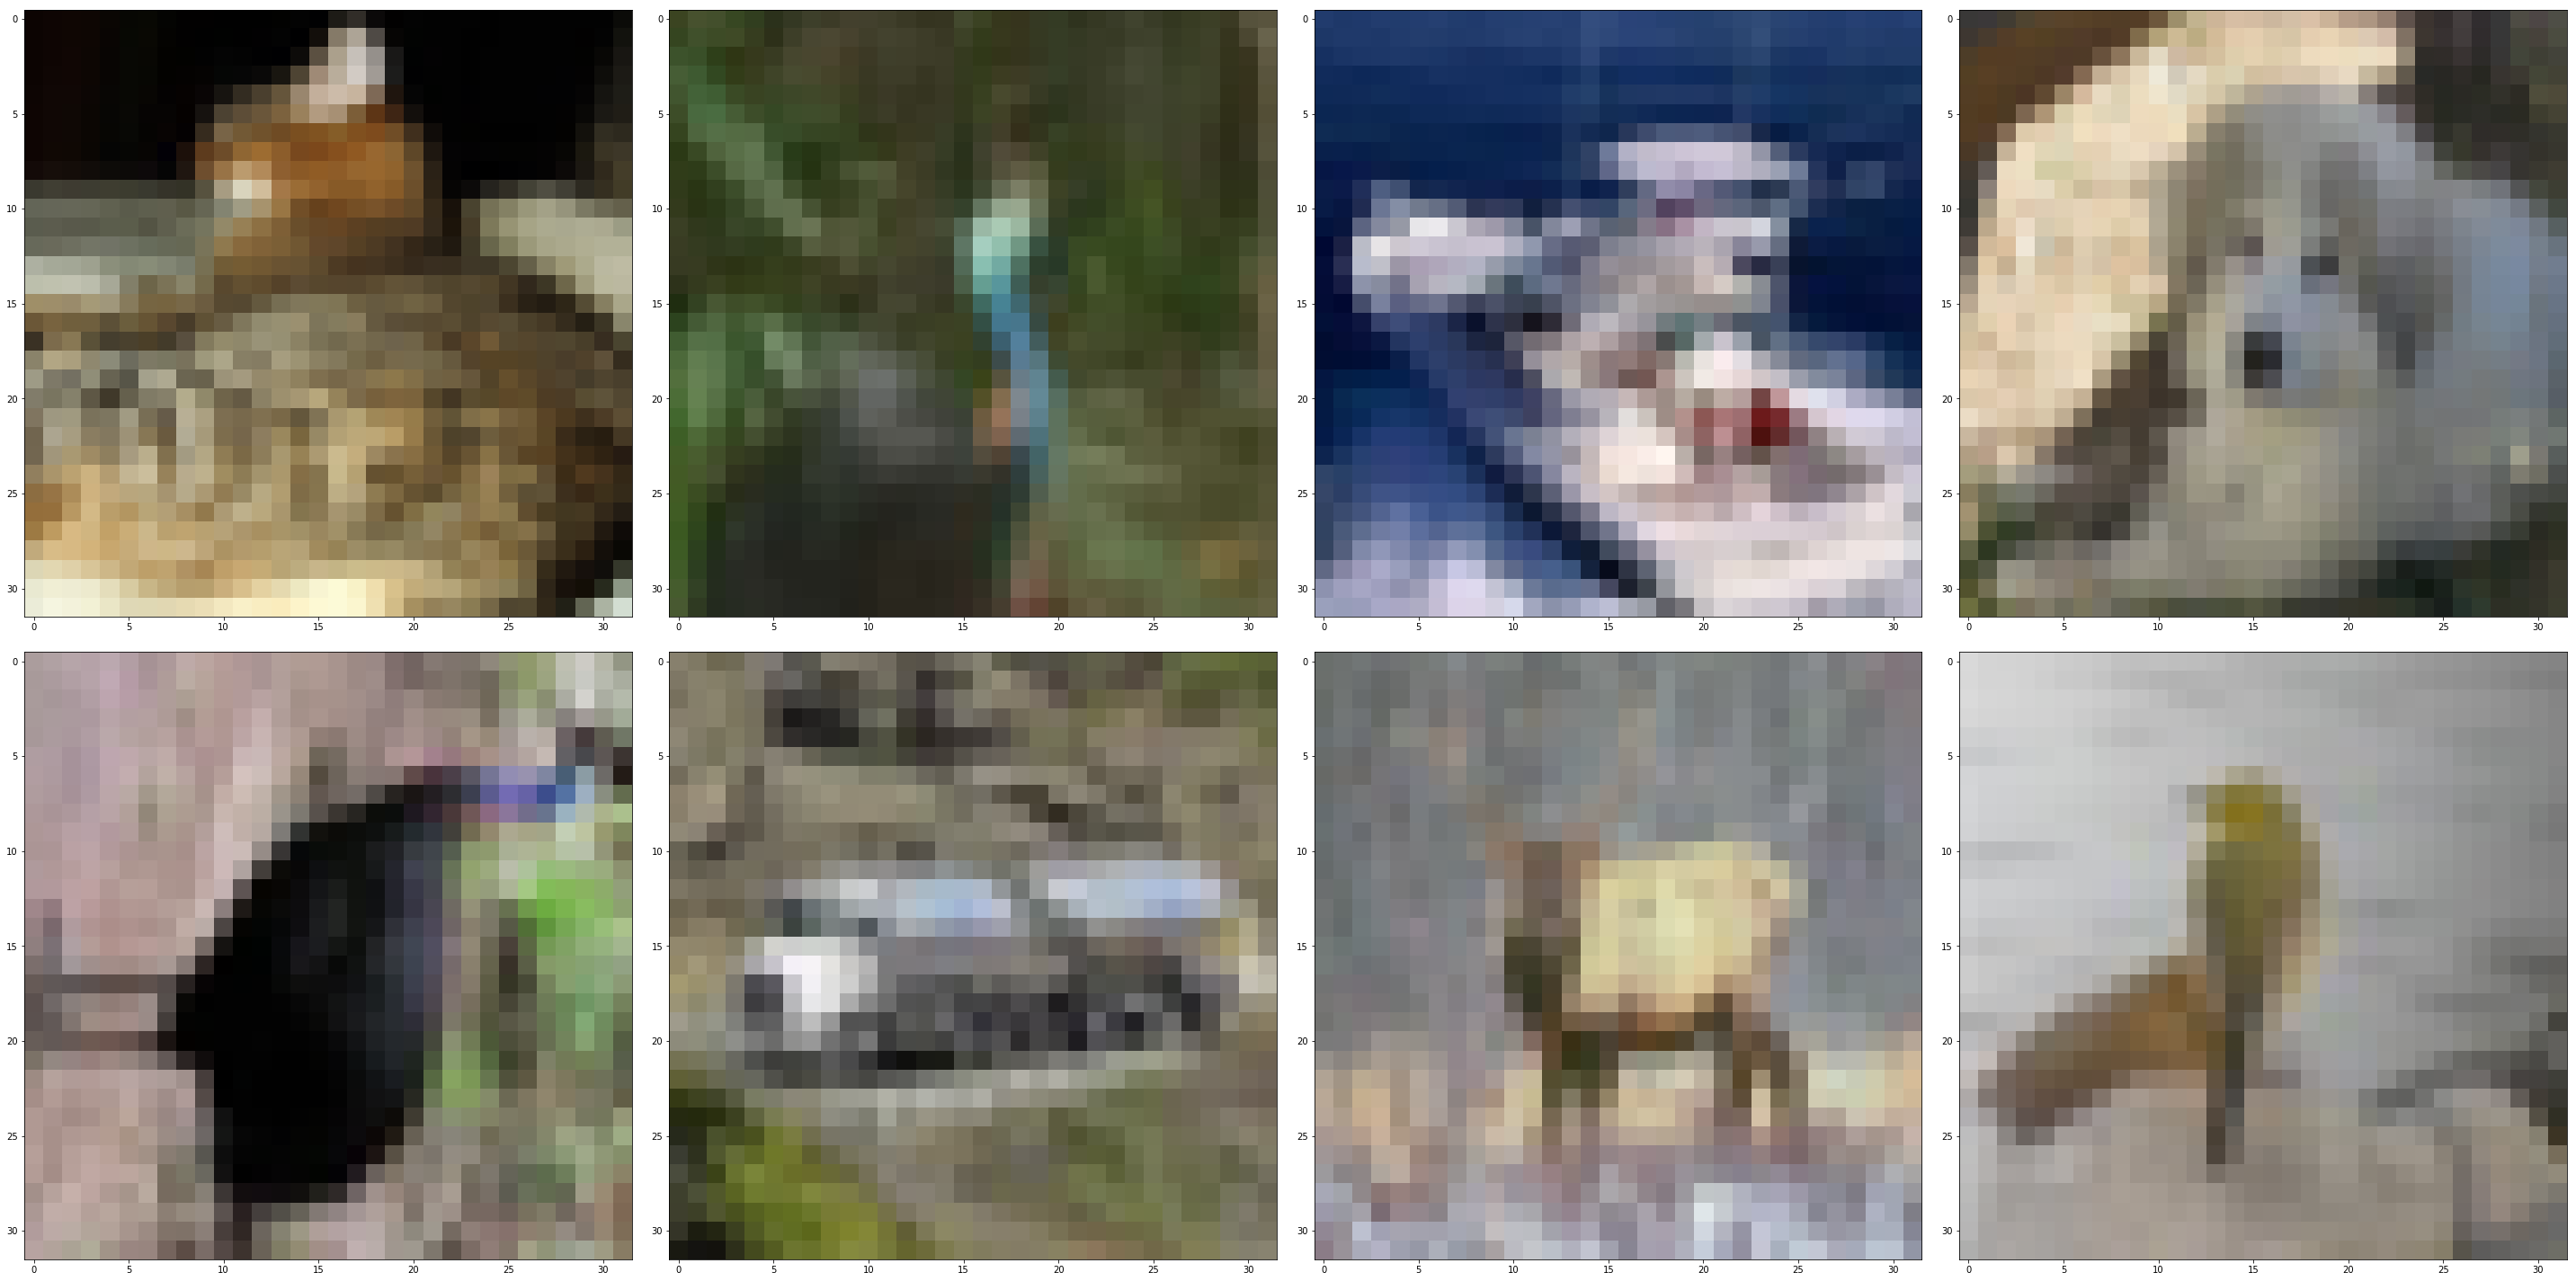

In [49]:
display_images(data["X_train"])

['additive-gaussian-noise', 0.8009999999999999, 'additive-gaussian-noise', 0.679, 1.0]


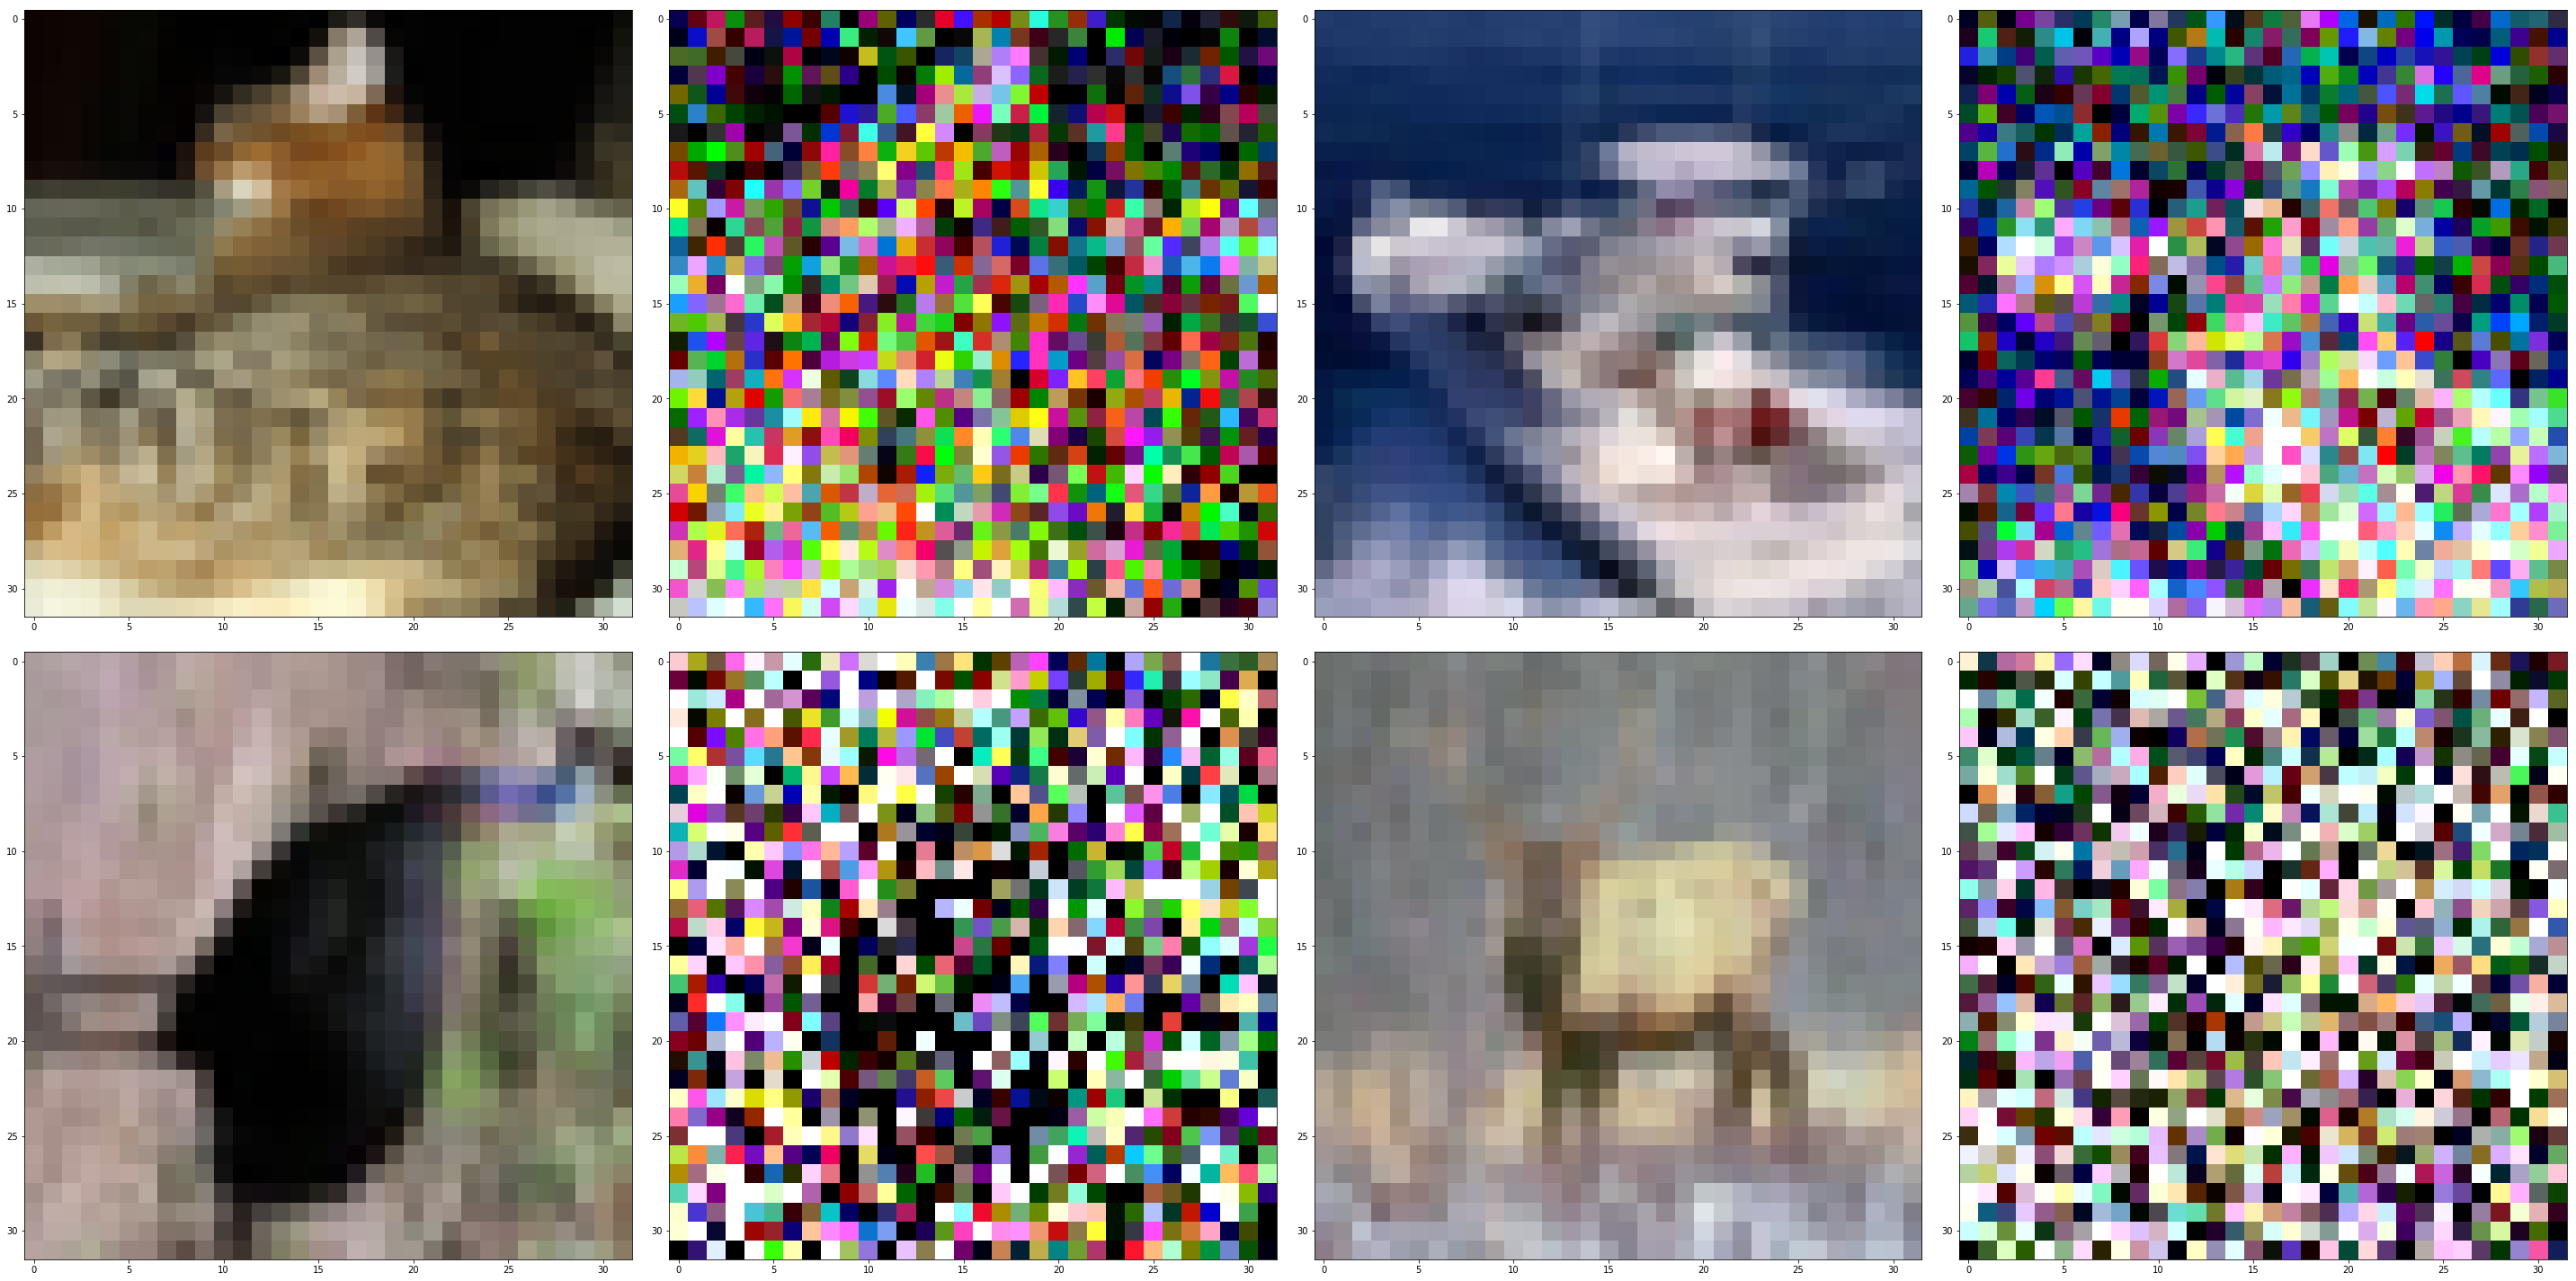

In [50]:
display_augmentation_by_trial_no(5, exp_df, data)

# Overfitting augmentations

366
['crop', 0.764, 'emboss', 0.006, 1.0]
393
['gamma-contrast', 0.0, 'add-to-hue-and-saturation', 0.8270000000000001, 1.0]
161
['crop', 0.97, 'add-to-hue-and-saturation', 0.904, 1.0]
263
['crop', 0.902, 'gaussian-blur', 0.858, 1.0]
182
['crop', 0.91, 'gaussian-blur', 0.963, 1.0]


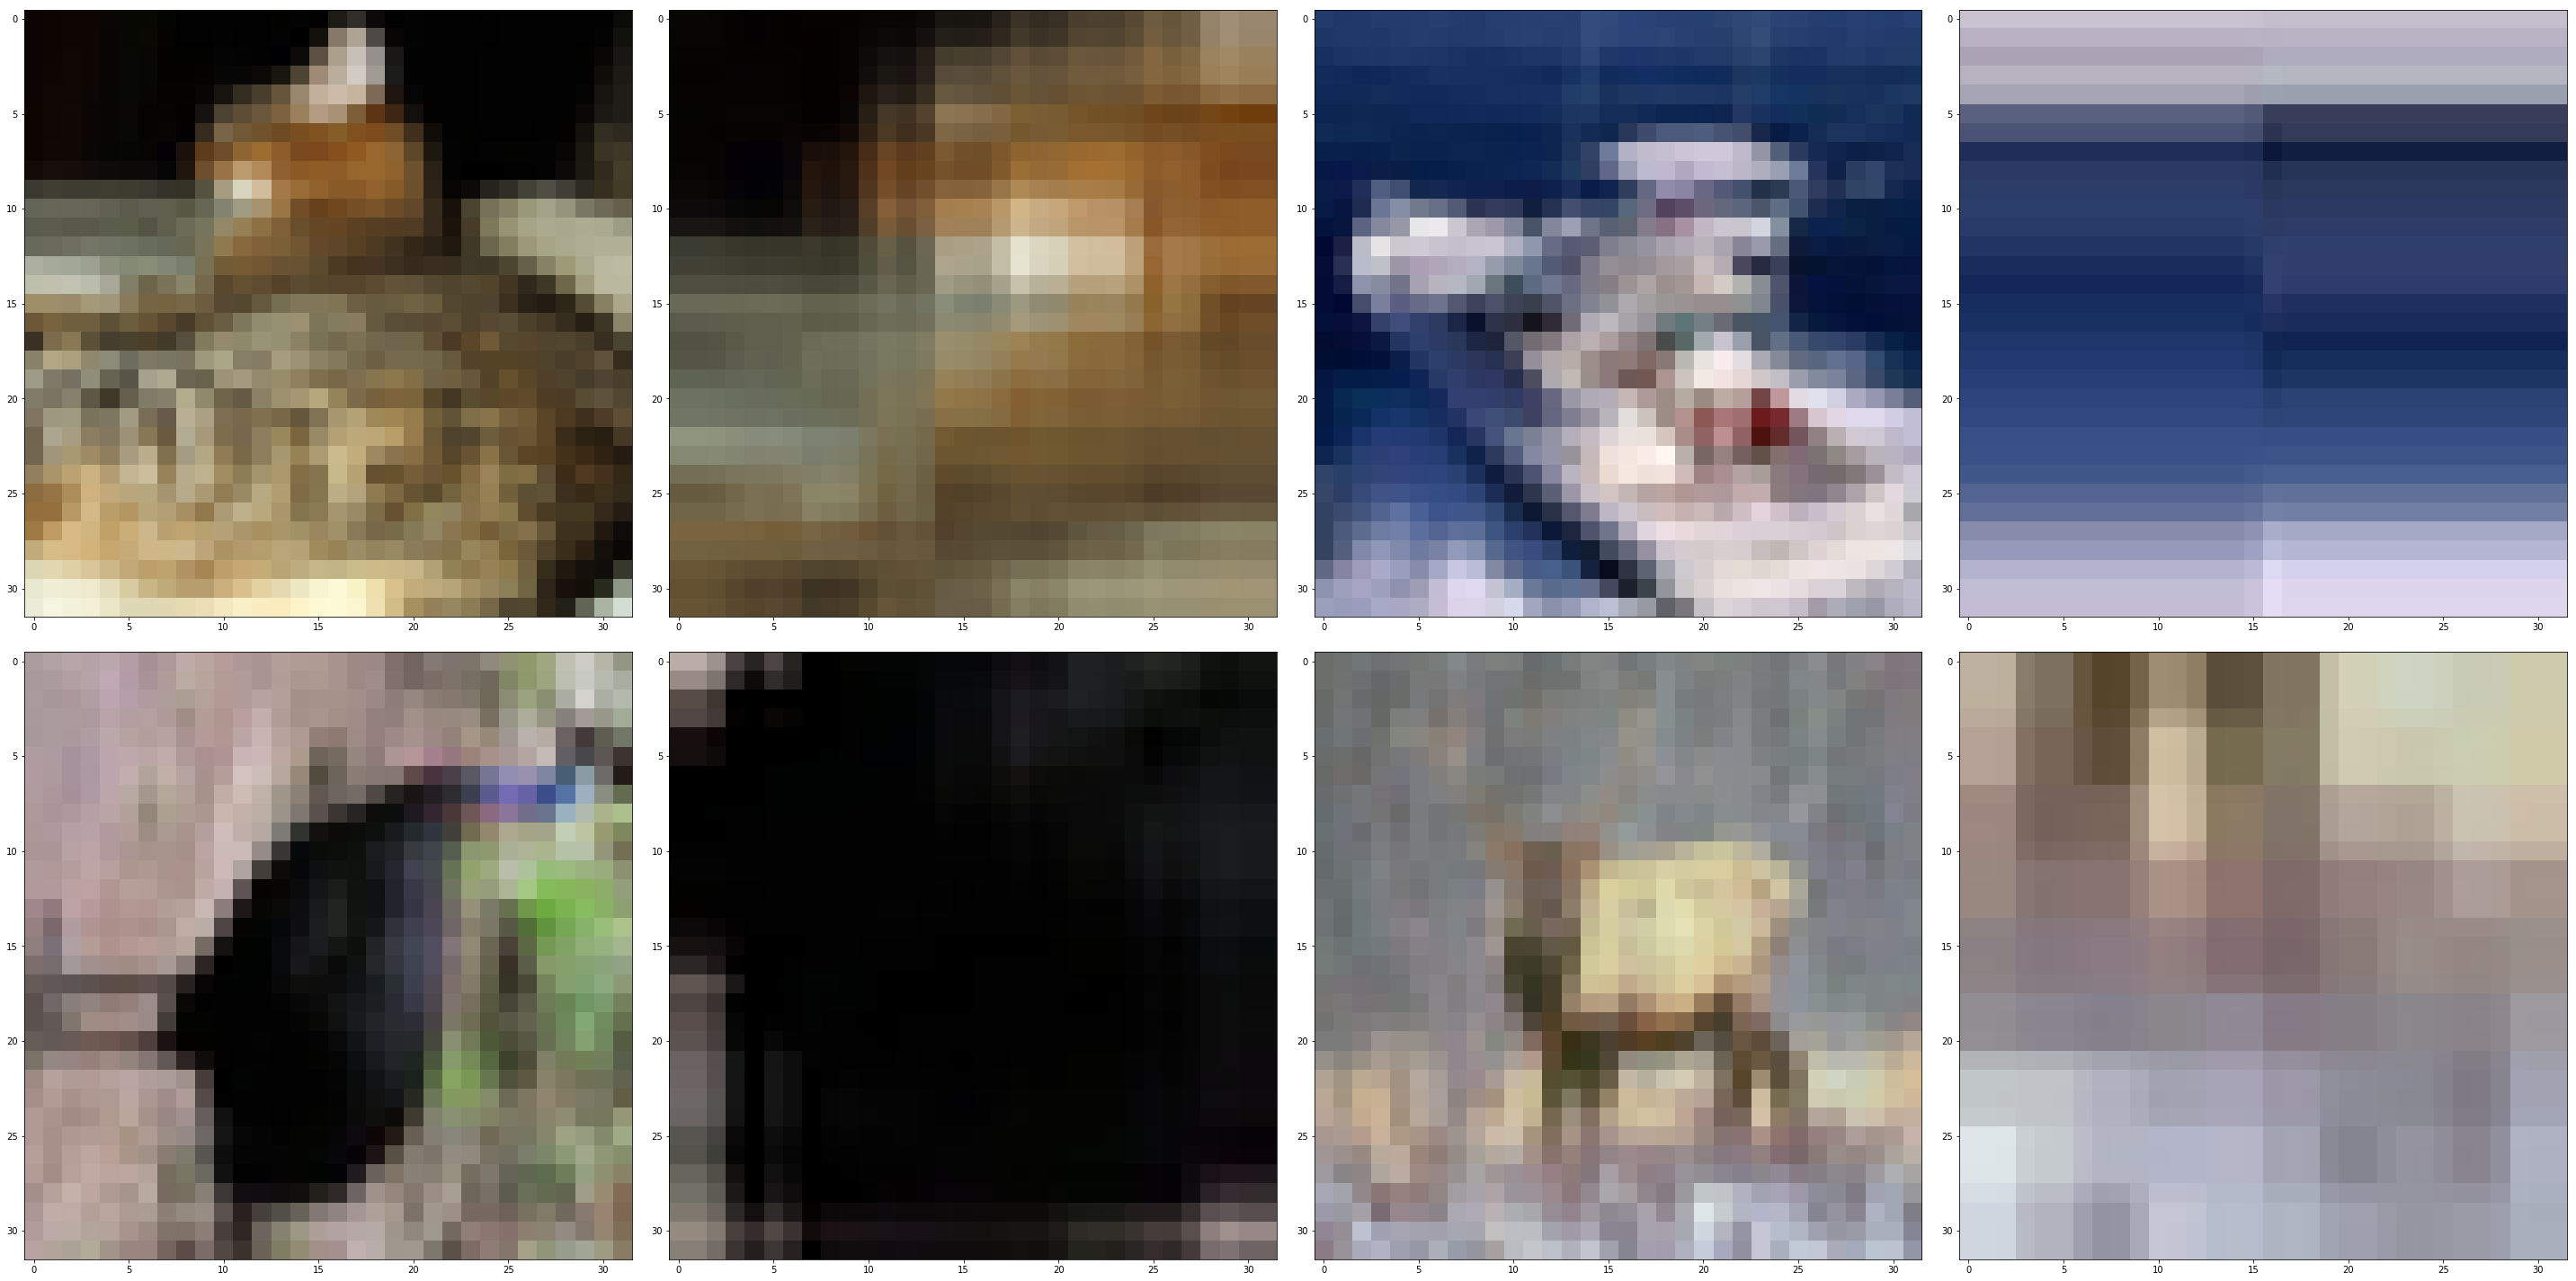

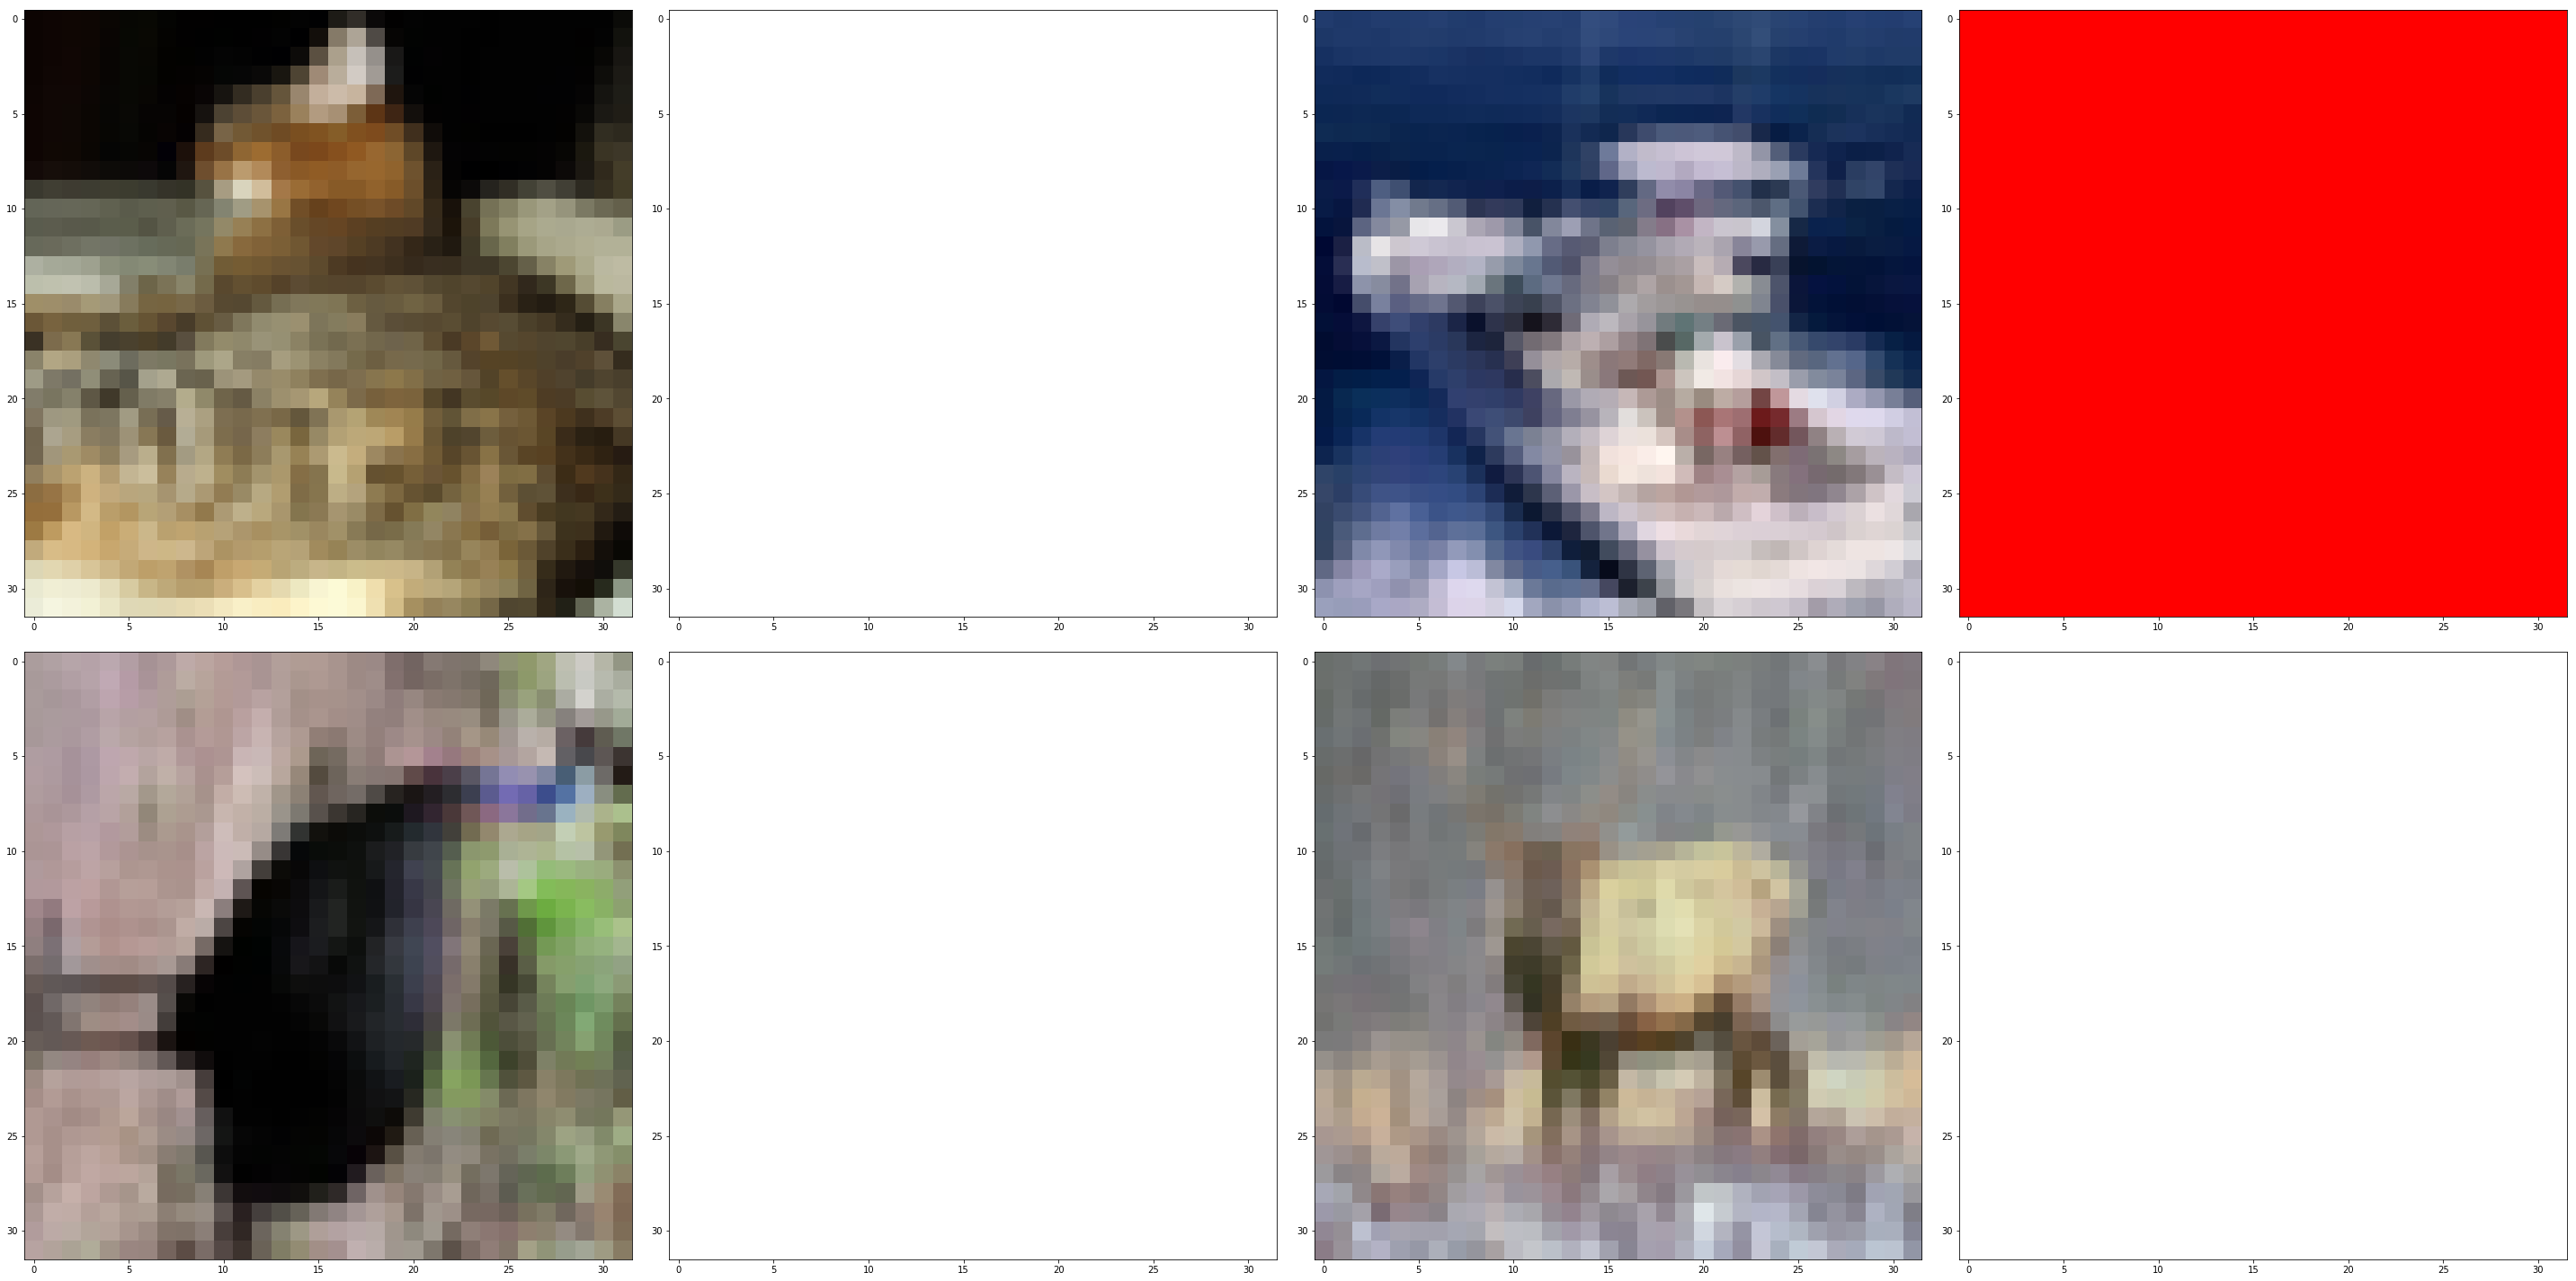

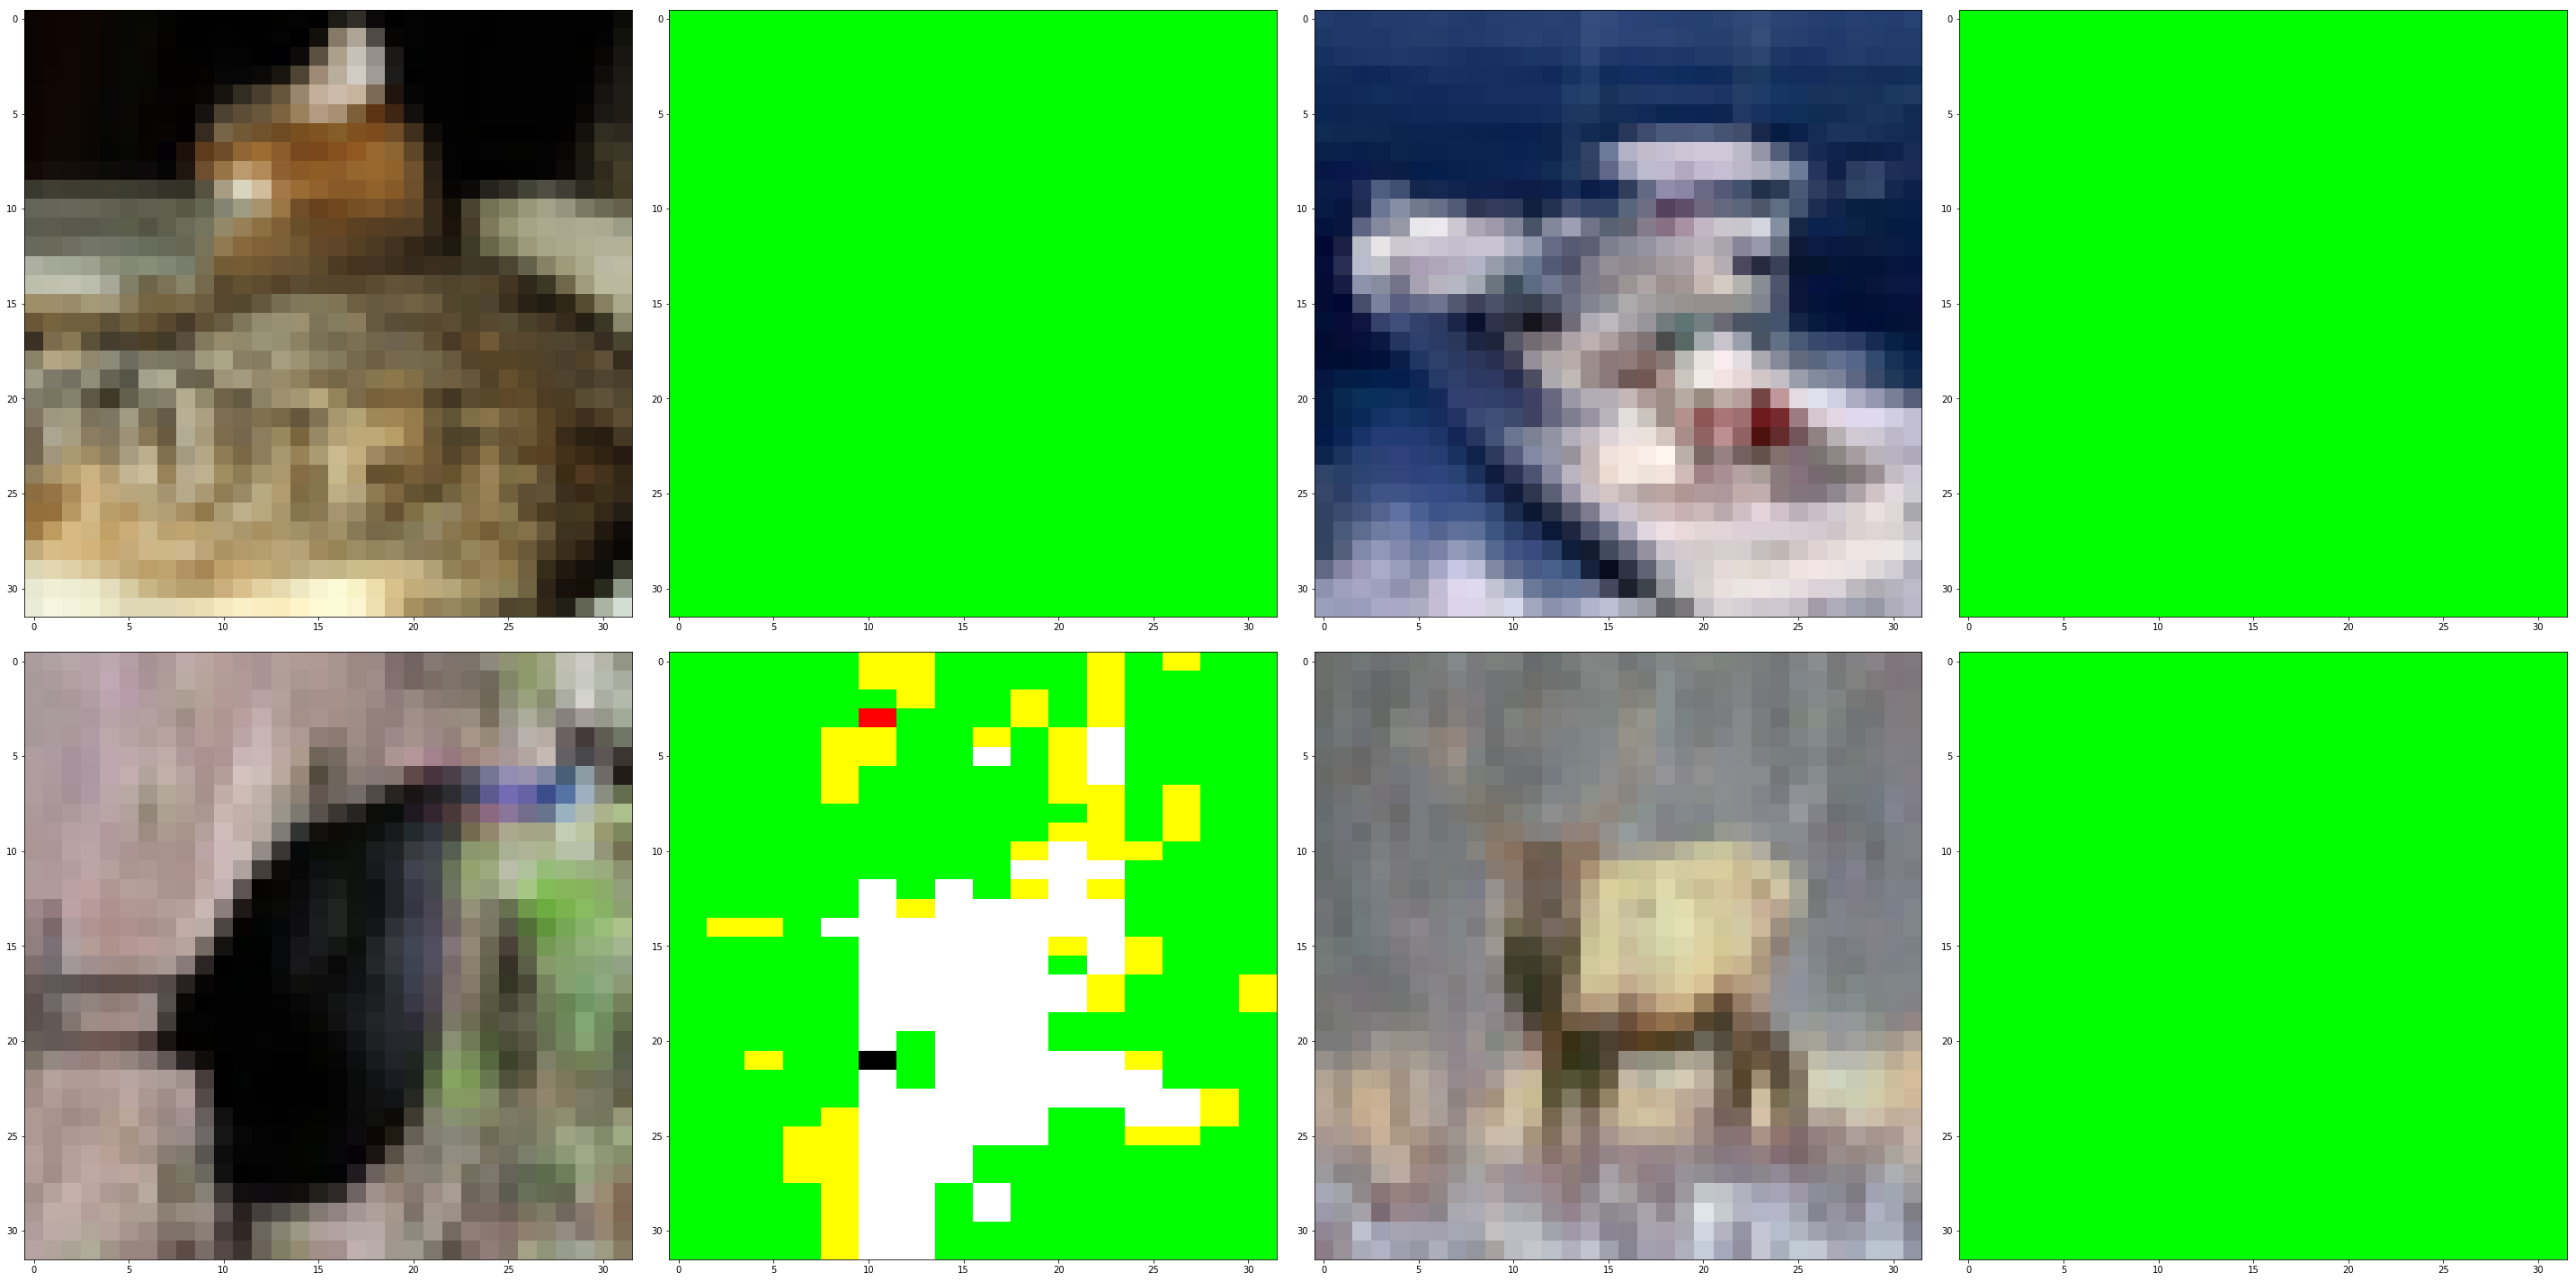

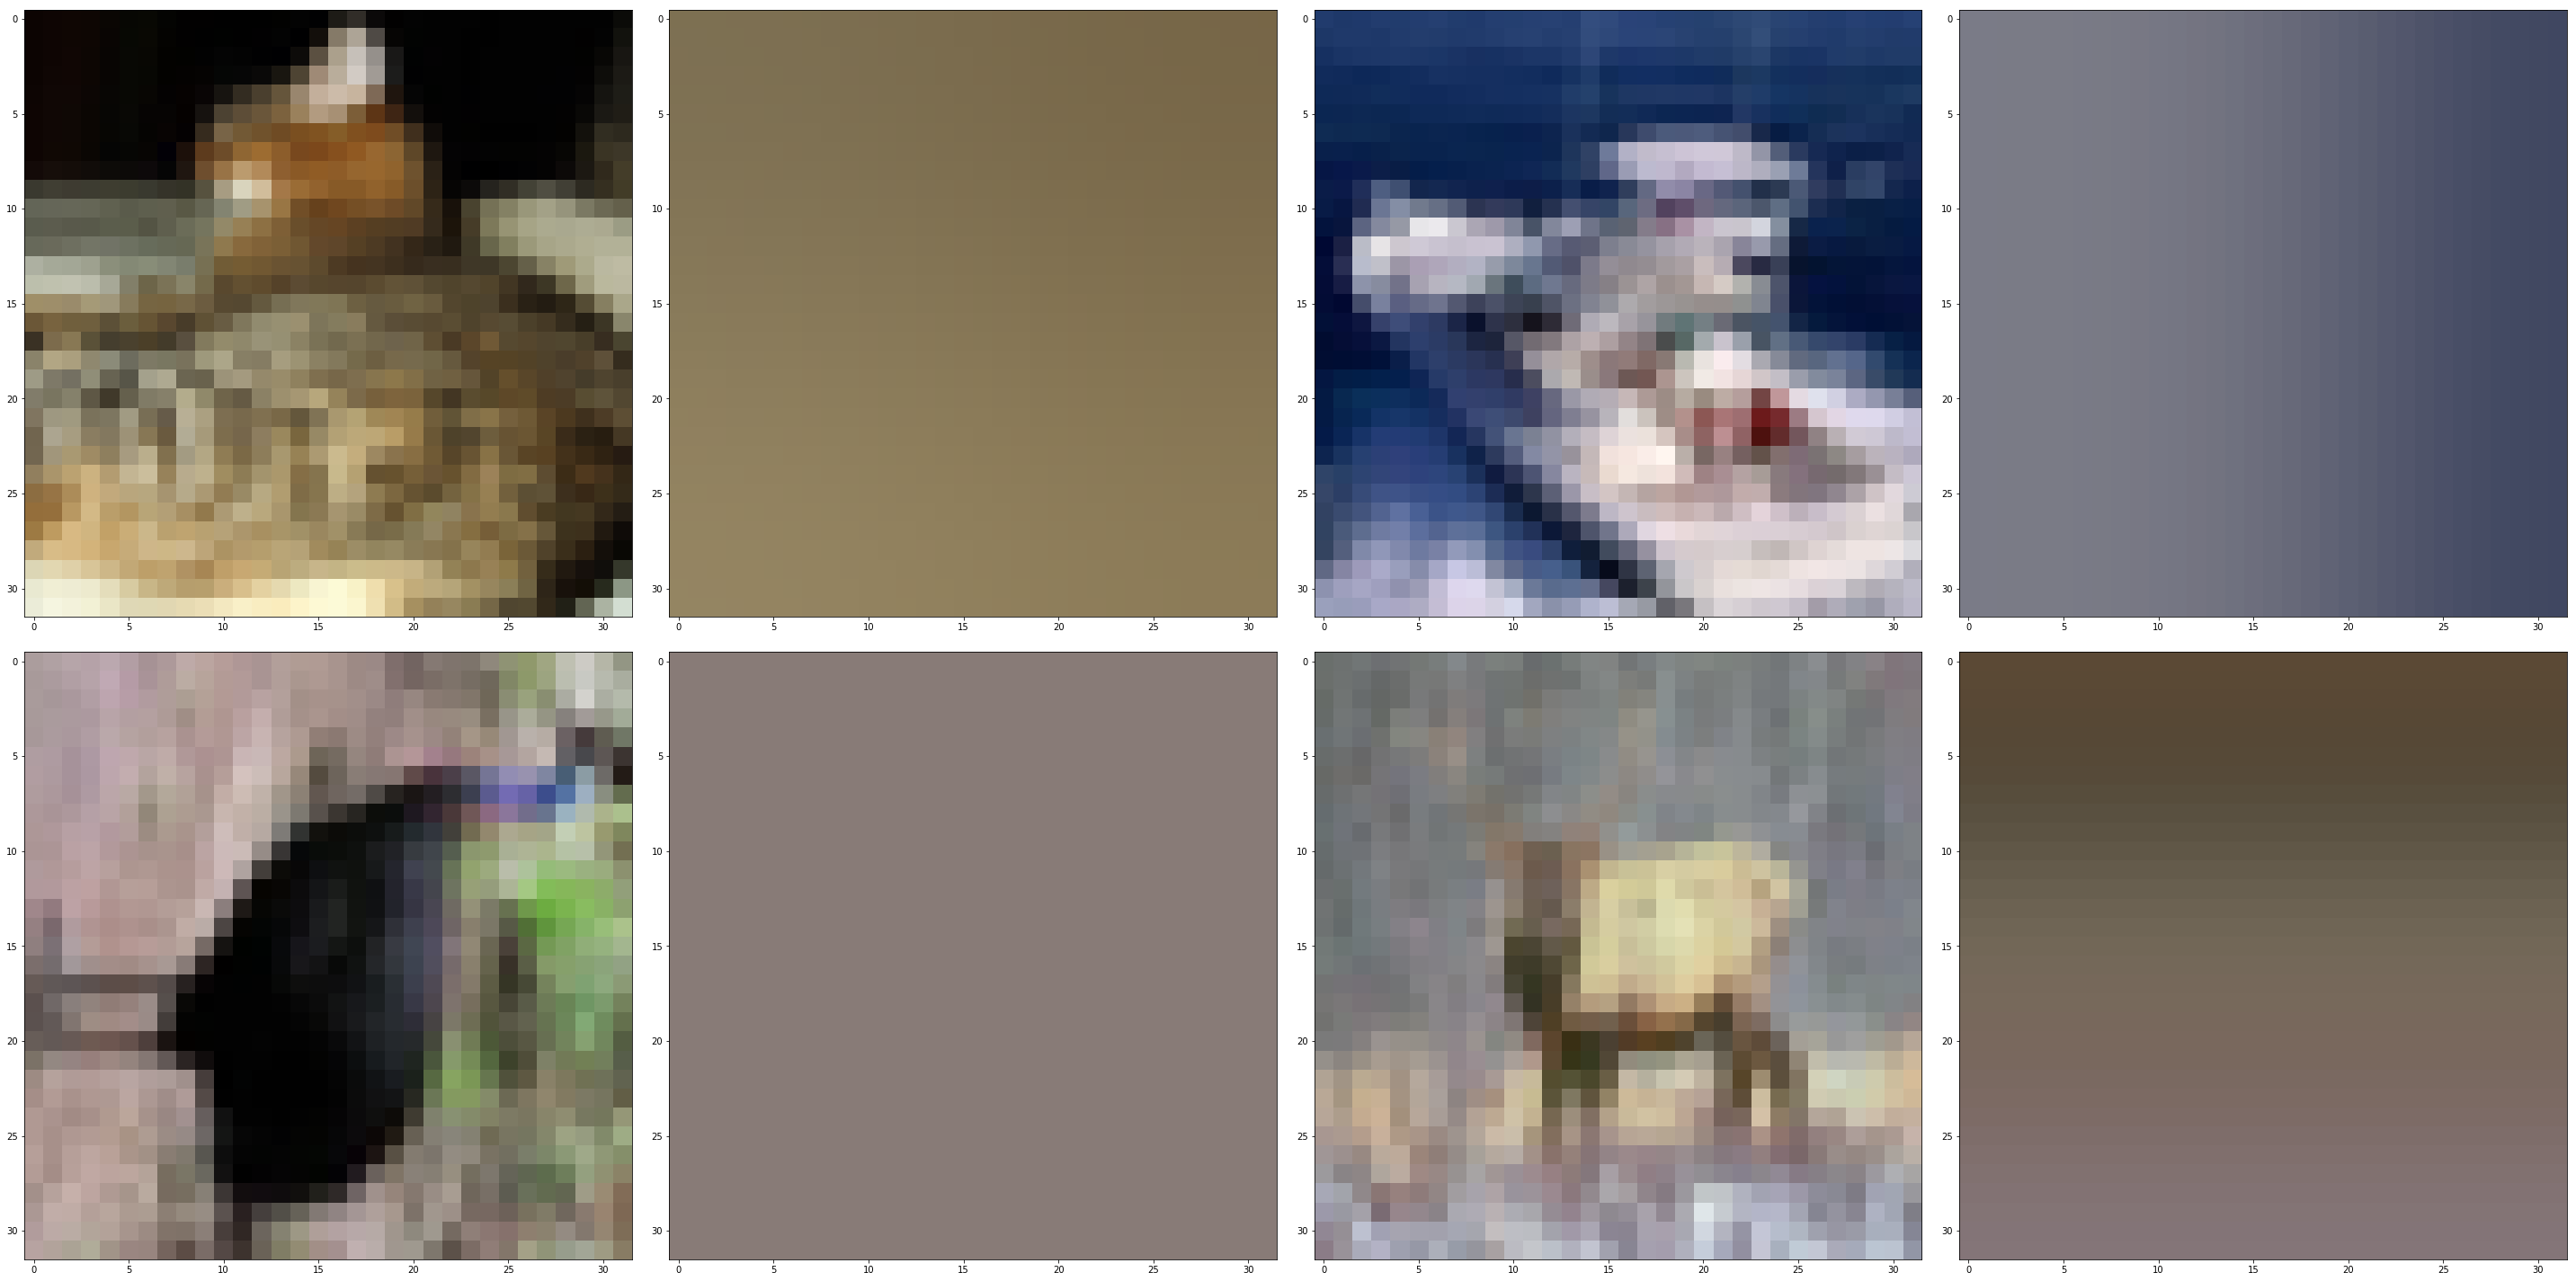

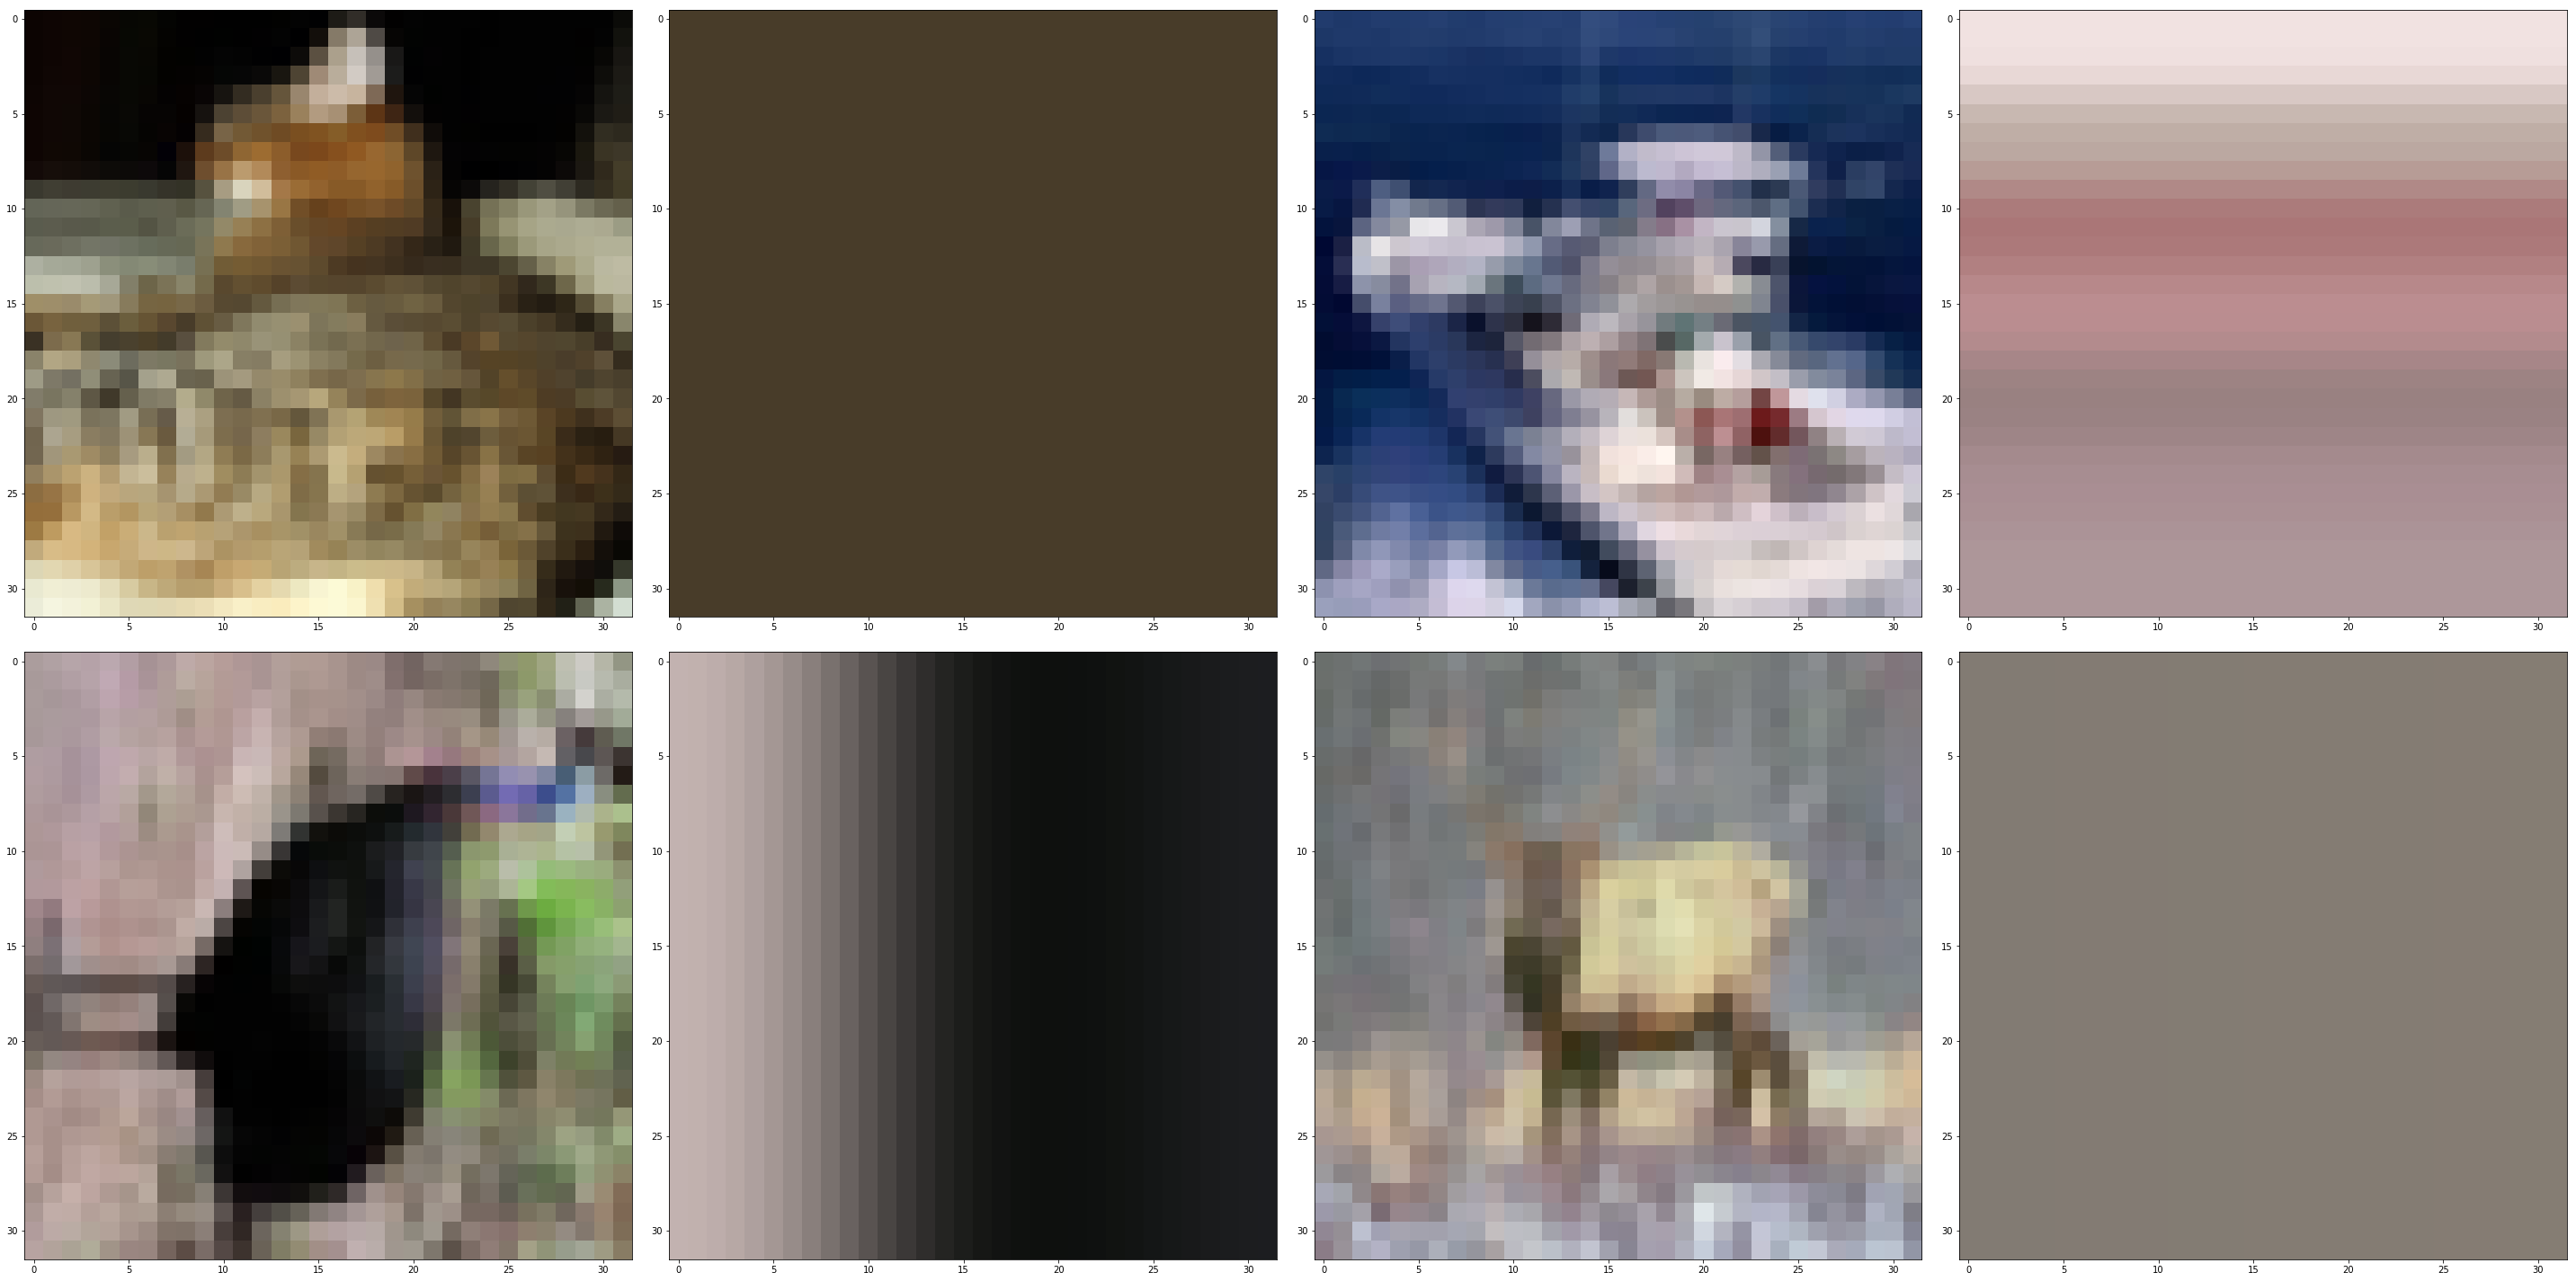

In [51]:
for i in top_policy_trial_no_arr:
    print (i)
    display_augmentation_by_trial_no(i, exp_df, data)

# Non-overfitting augmentations

In [52]:
acc_overfit_by_trial = exp_df[exp_df["epoch"]<20].groupby("trial_no").sum()["acc_overfit"]

# if acc_overfit is negative, that means validation is more accurate than training, so augmentation overfits
modified_exp_df = pd.merge(
    exp_df, 
    pd.DataFrame(acc_overfit_by_trial).reset_index().rename(columns={"acc_overfit":"total_acc_overfit"}),
    on="trial_no",
    how="left"
)

non_overfitting_exp_df = modified_exp_df[modified_exp_df["total_acc_overfit"]>0]

trial_no: 128
['crop', 0.635, 'crop', 0.085, 0.988, 1, 1.0]
trial_no: 391


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['crop', 0.327, 'clouds', 0.7859999999999999, 0.858, 1, 1.0]
trial_no: 290
['shear', 0.9009999999999999, 'translate-y', 0.747, 0.415, 1, 1.0]
trial_no: 45


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['brighten', 0.003, 'brighten', 0.9520000000000001, 0.9840000000000001, 1, 1.0]
trial_no: 47


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['fog', 0.003, 'translate-x', 0.787, 0.483, 1, 1.0]


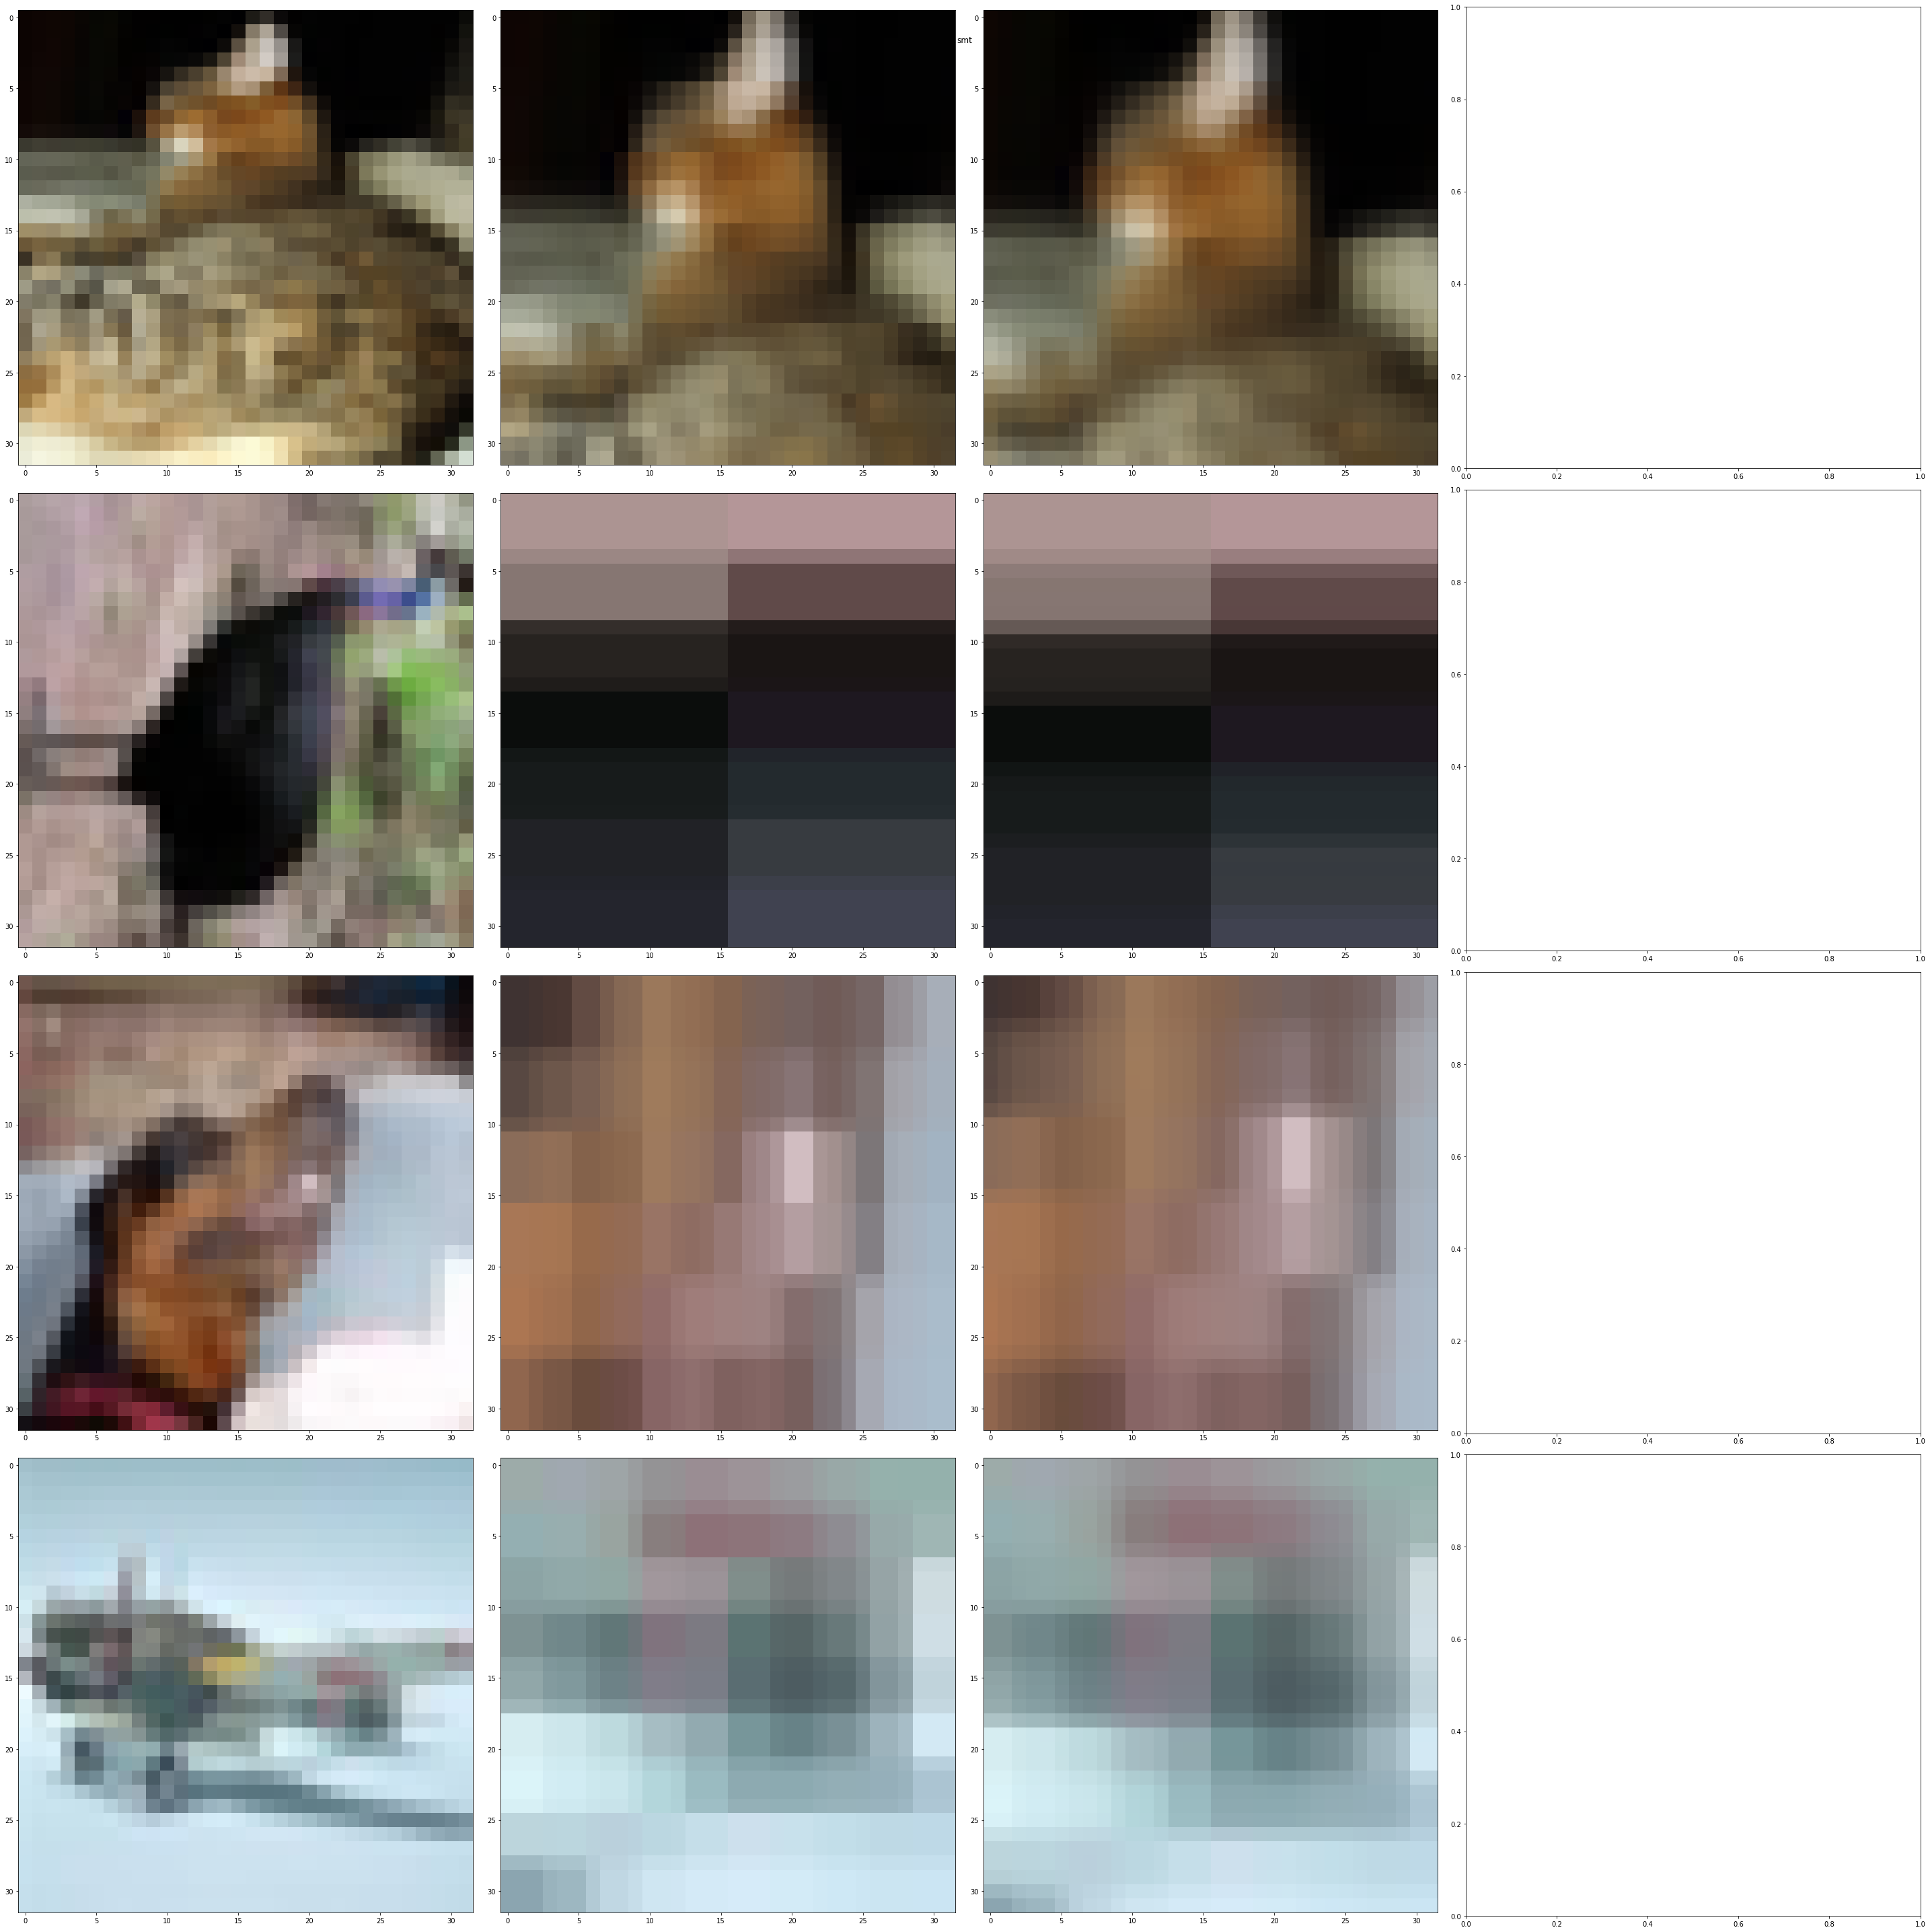

<Figure size 144x144 with 0 Axes>

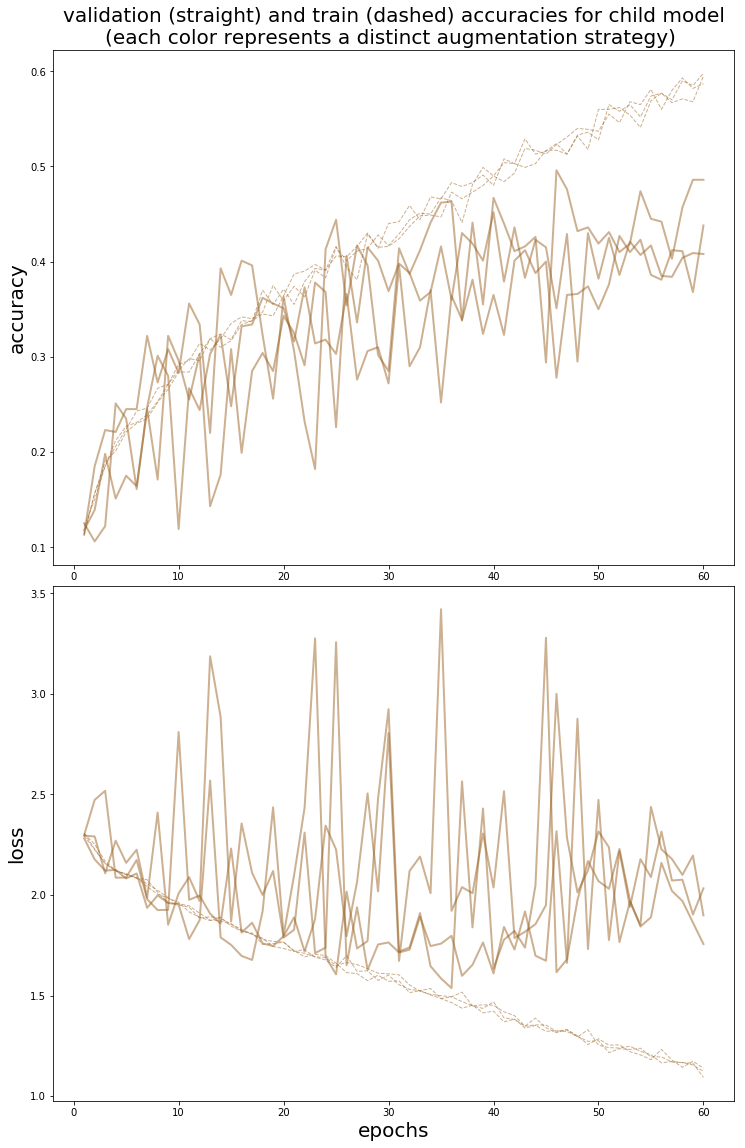

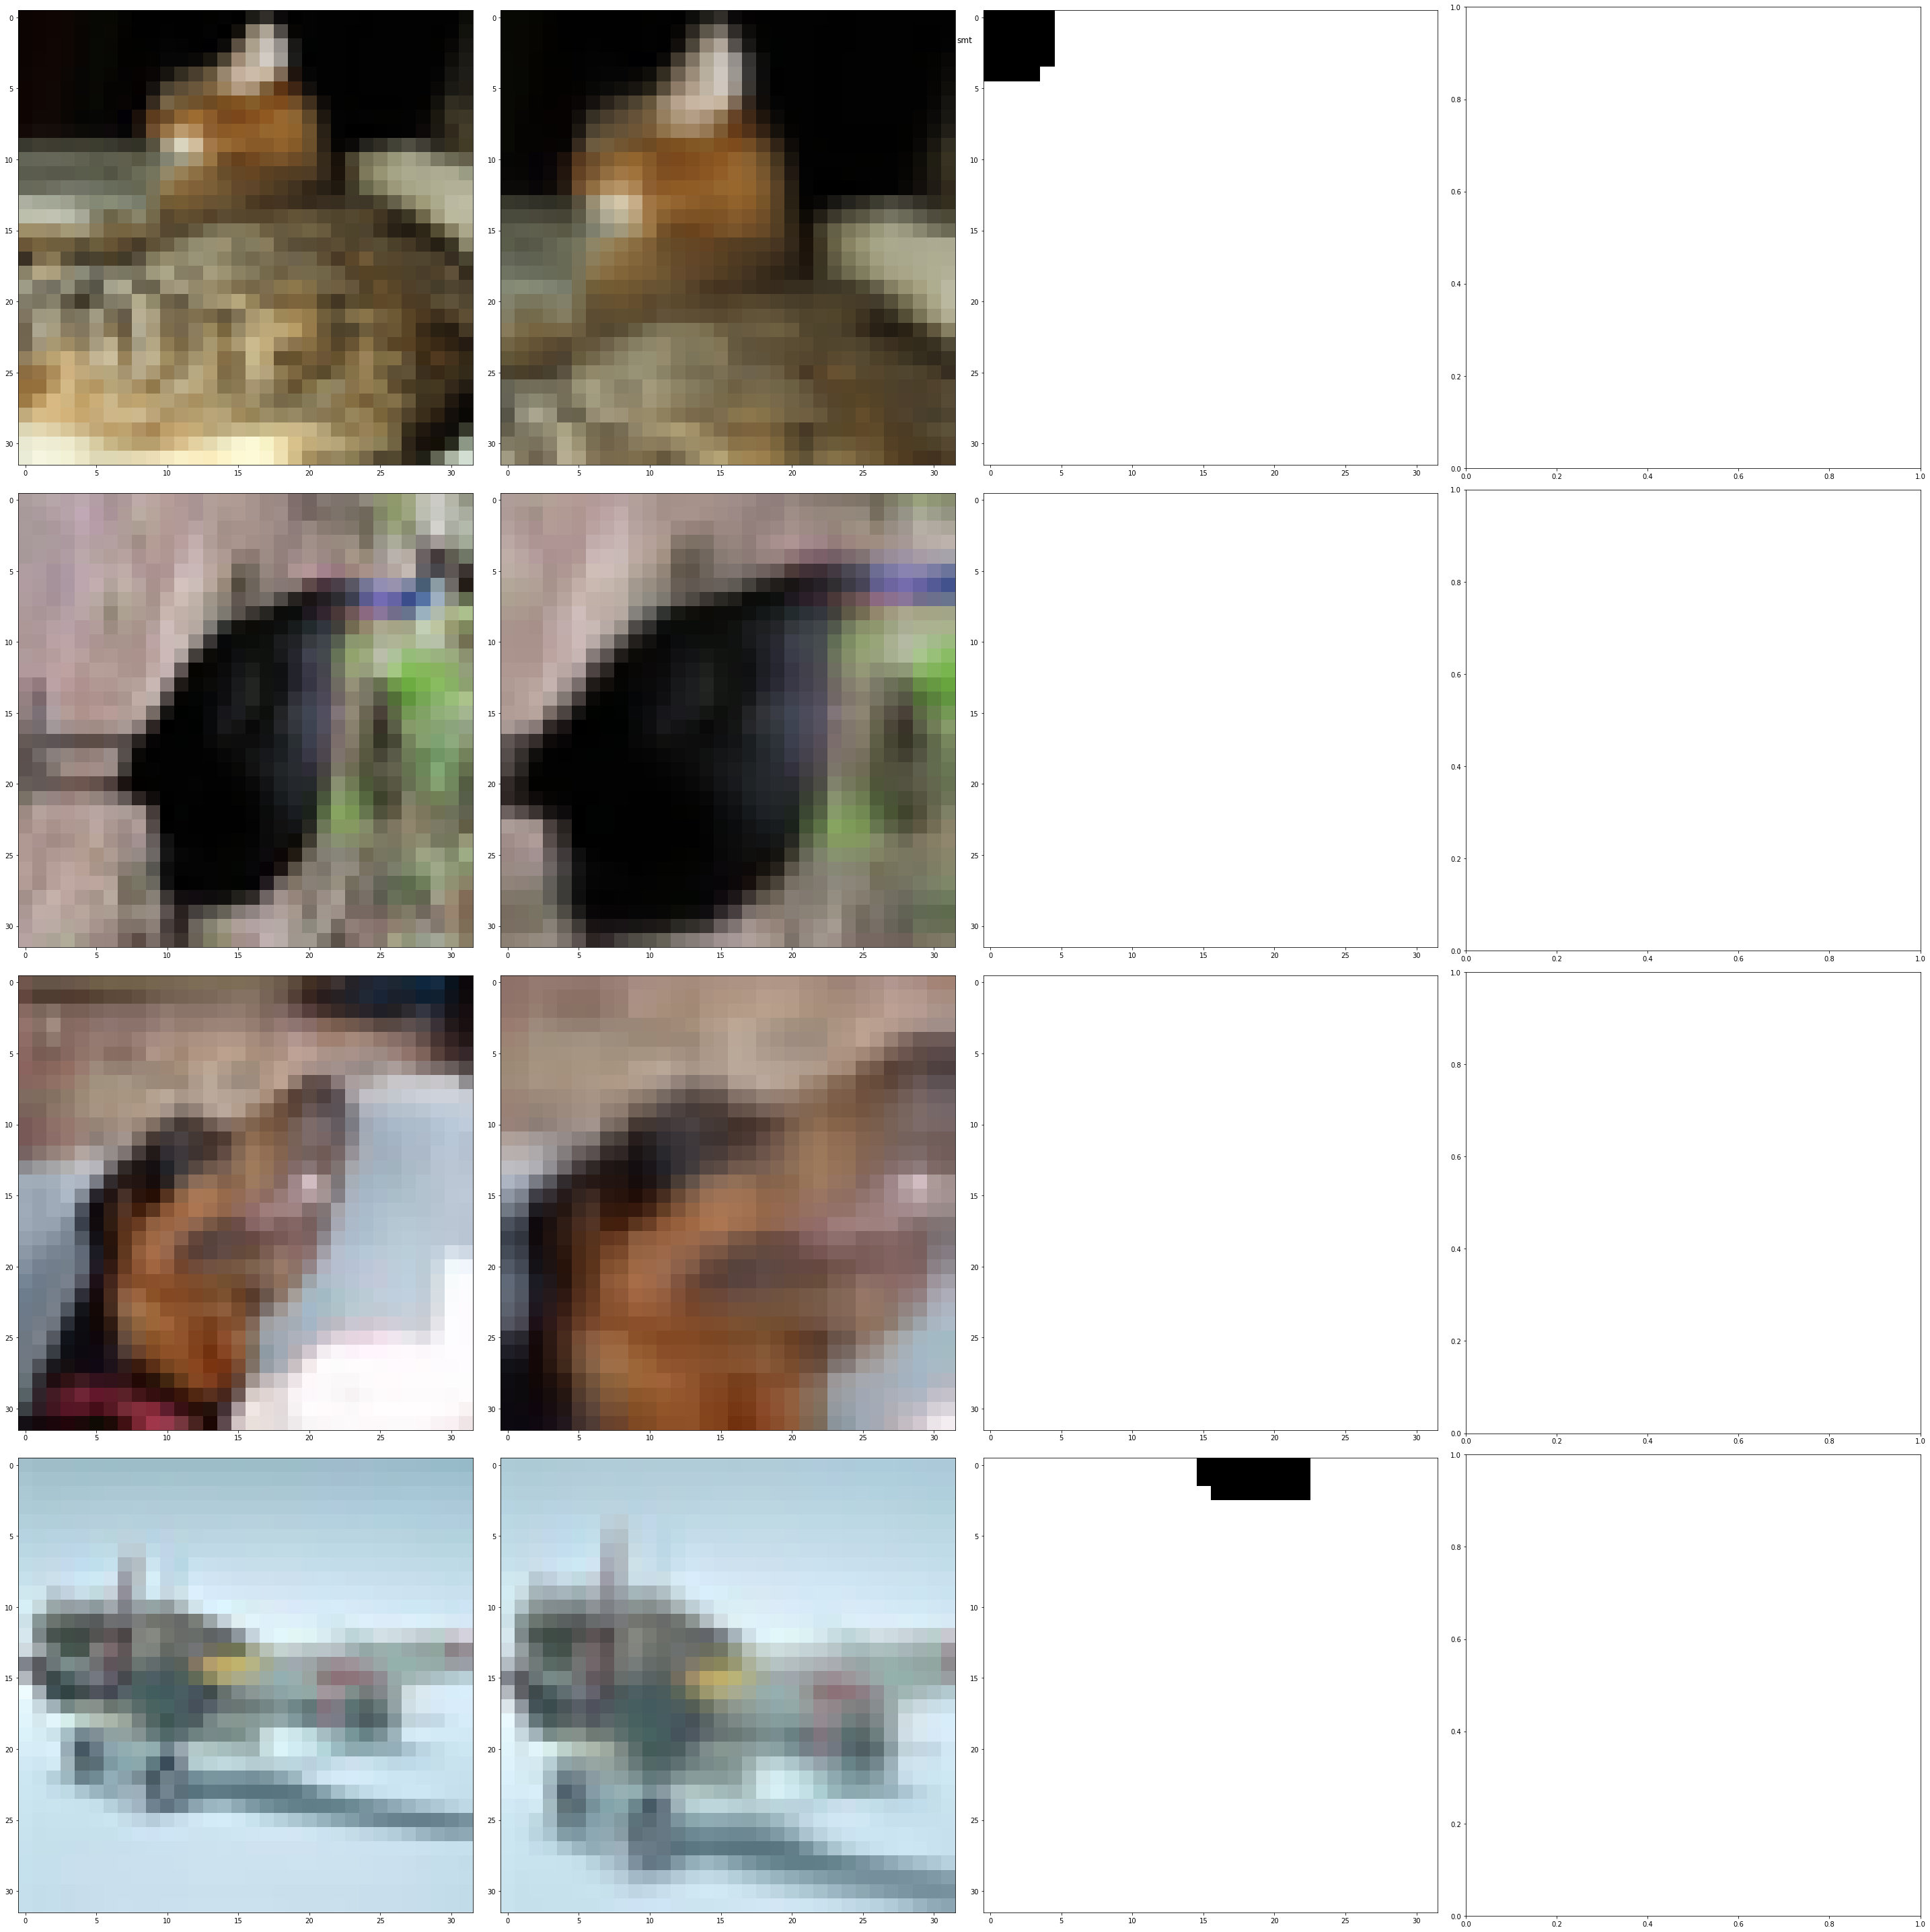

<Figure size 144x144 with 0 Axes>

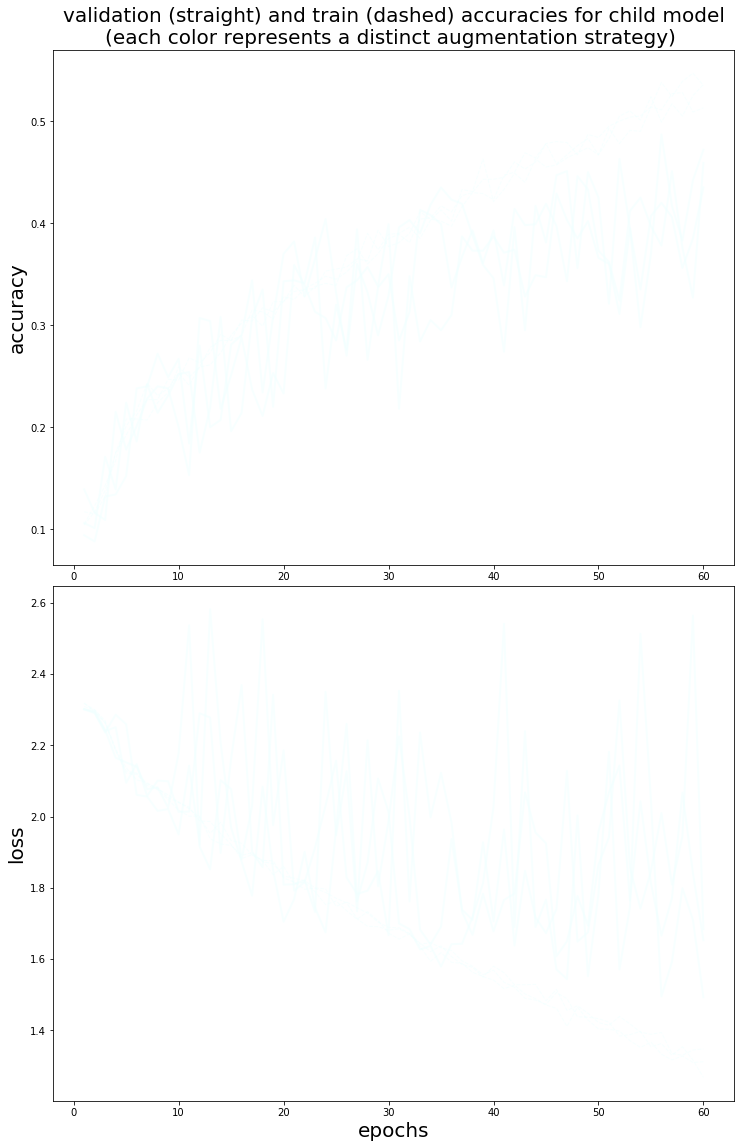

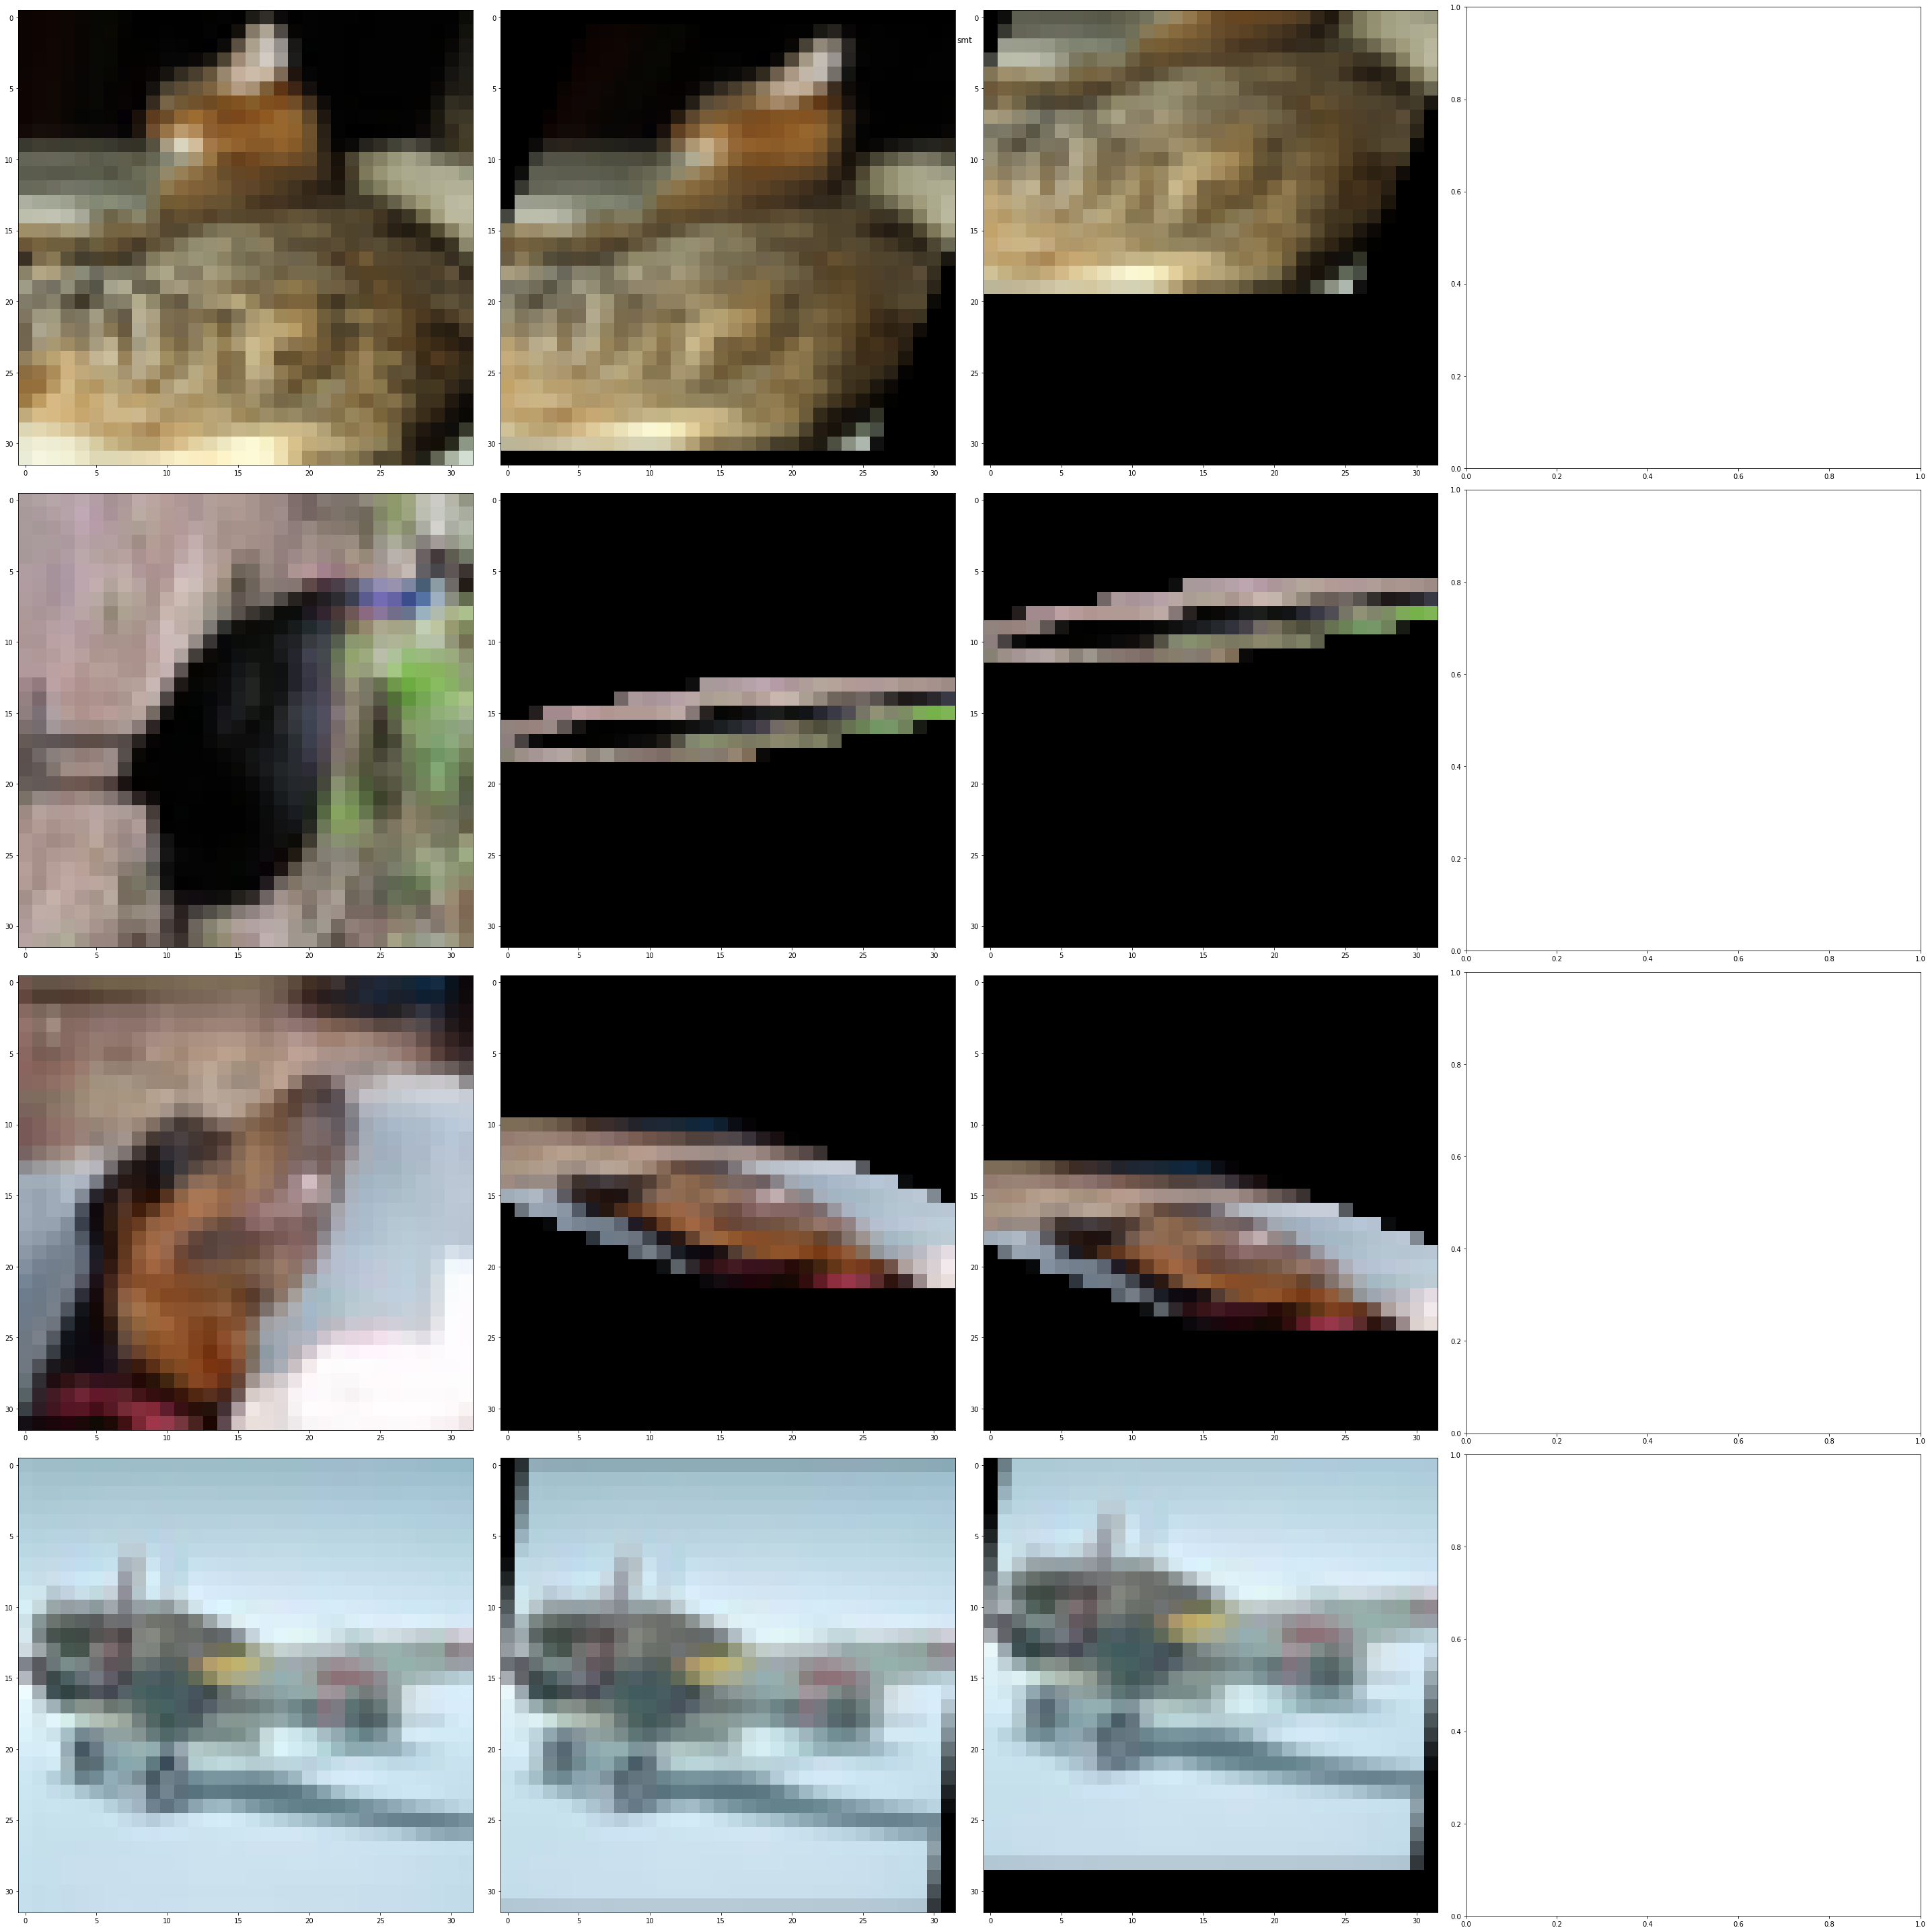

<Figure size 144x144 with 0 Axes>

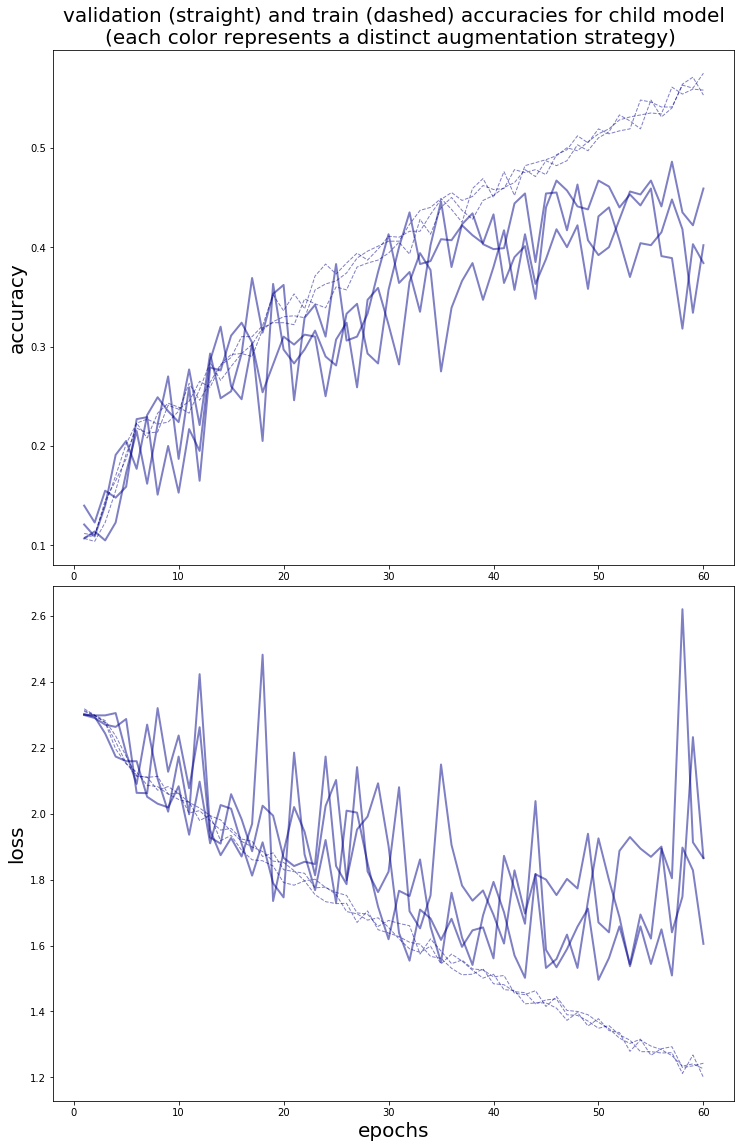

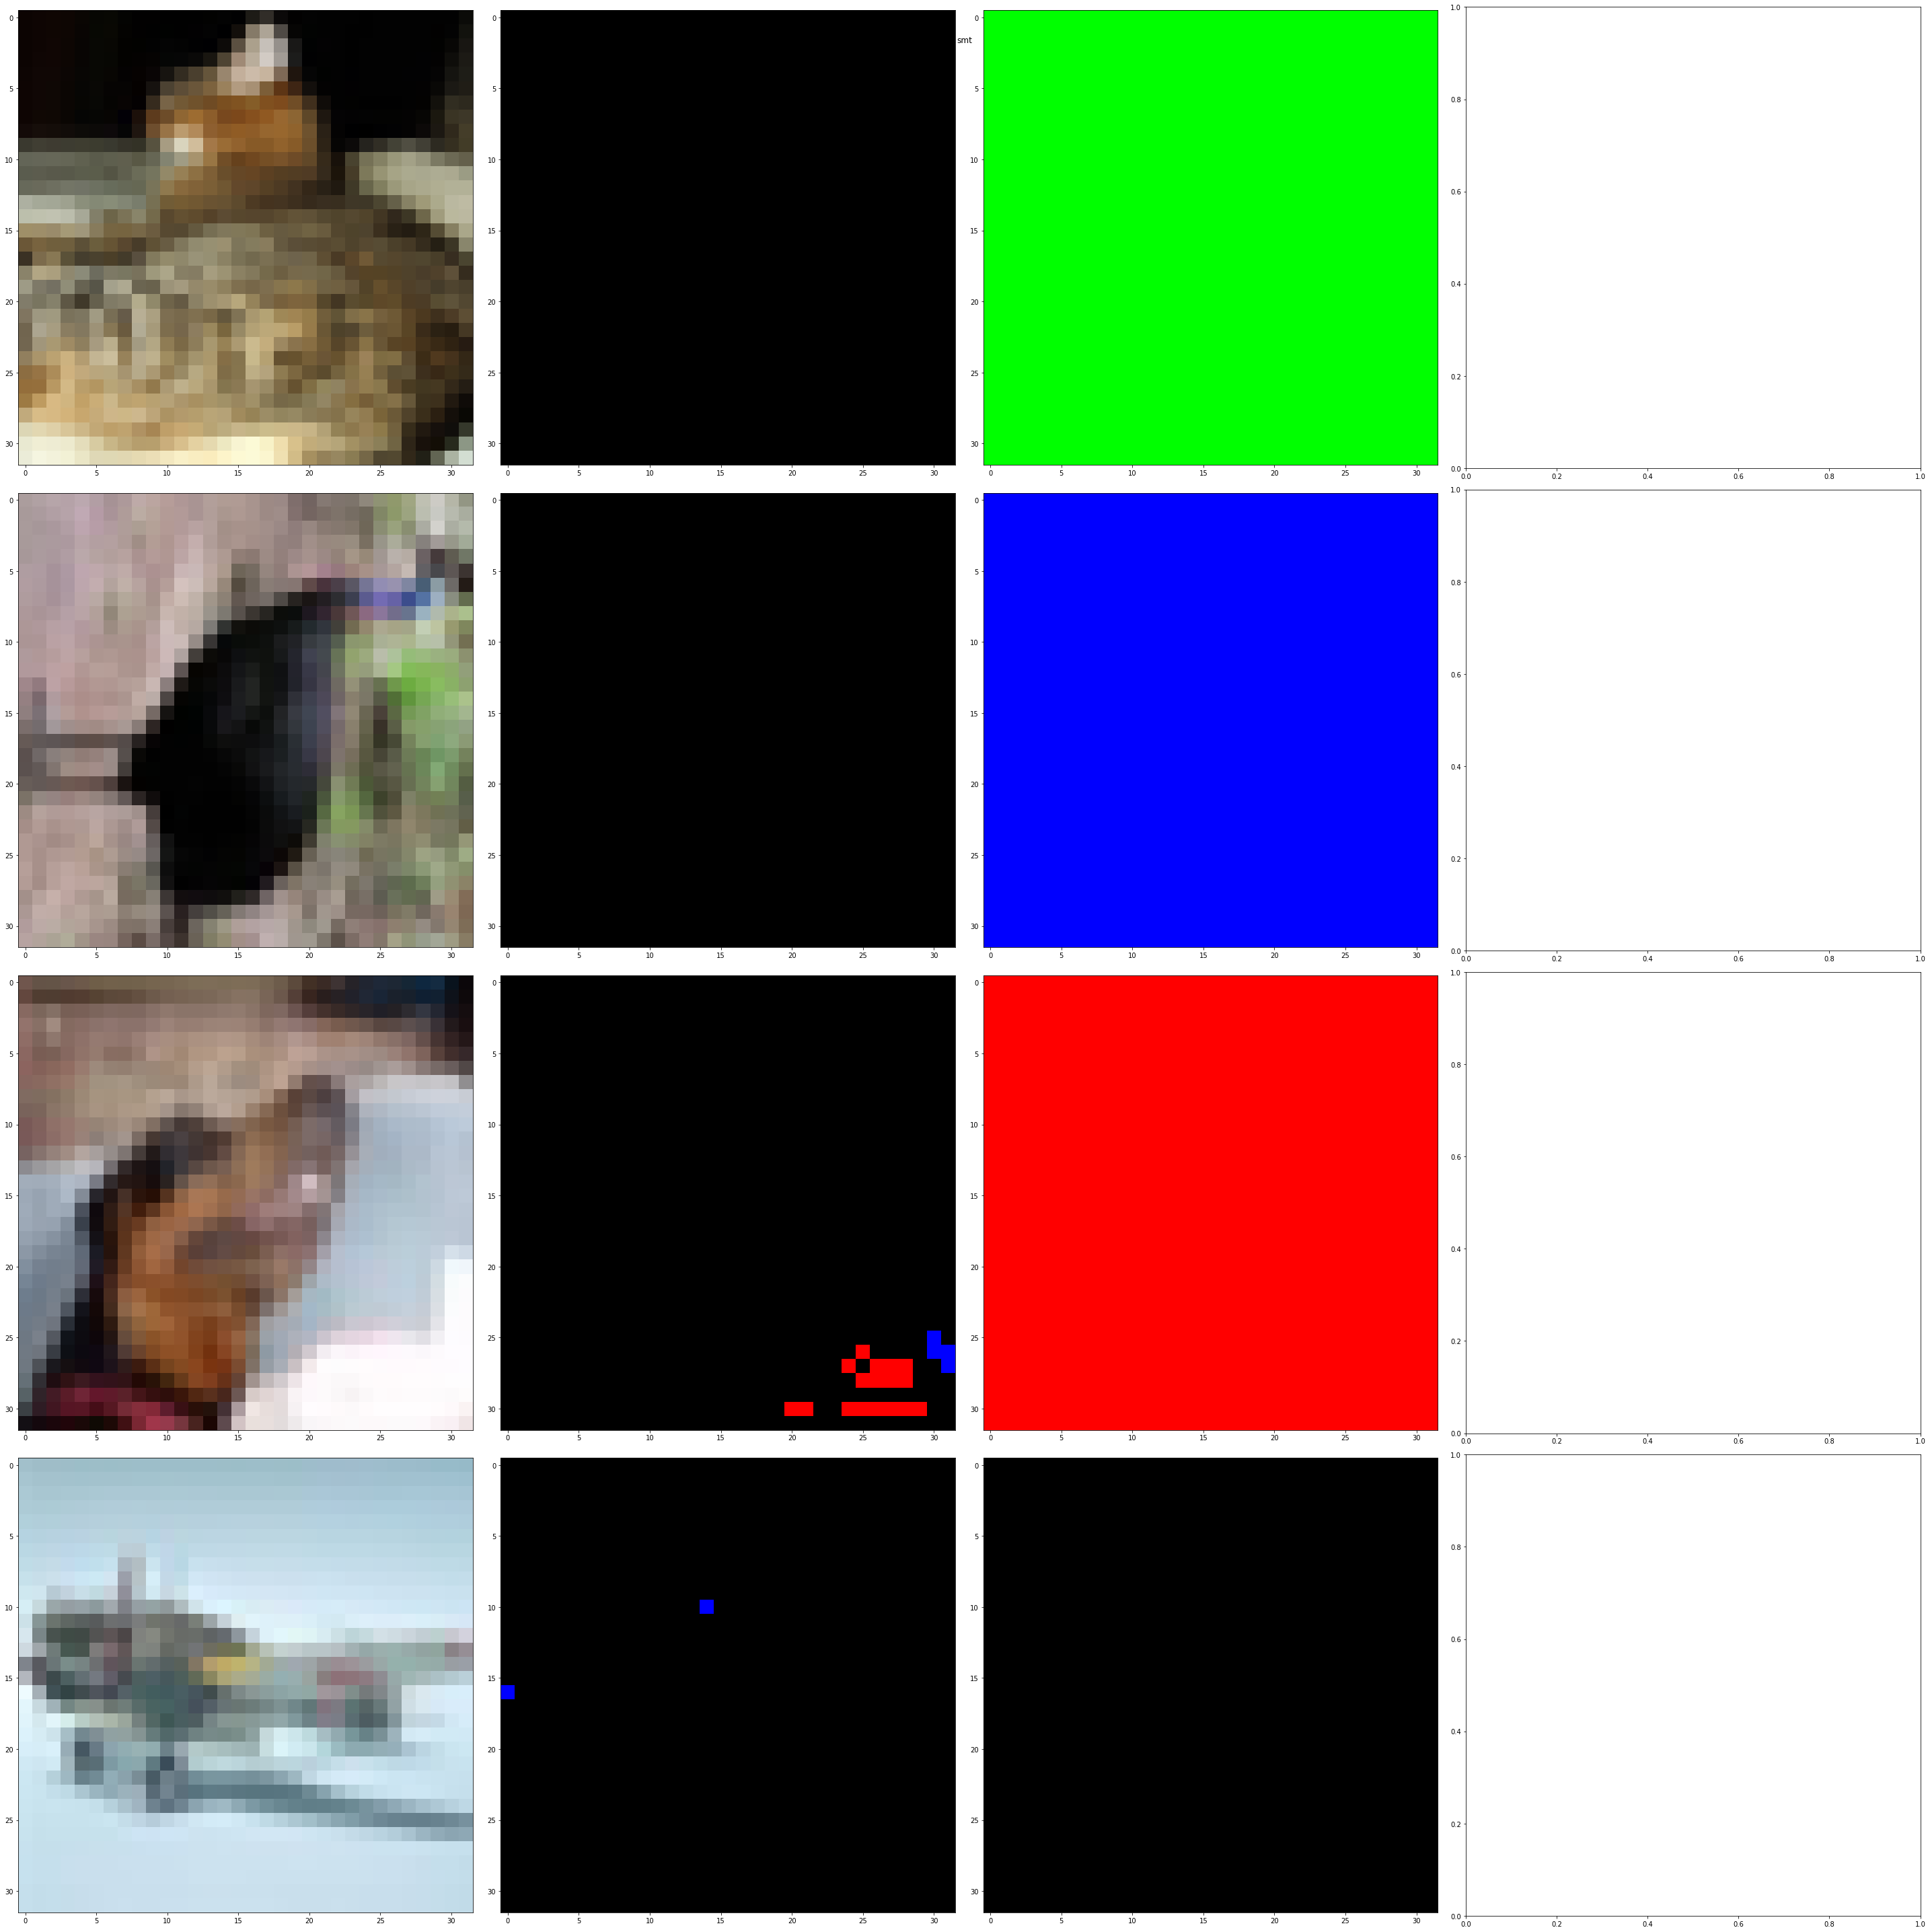

<Figure size 144x144 with 0 Axes>

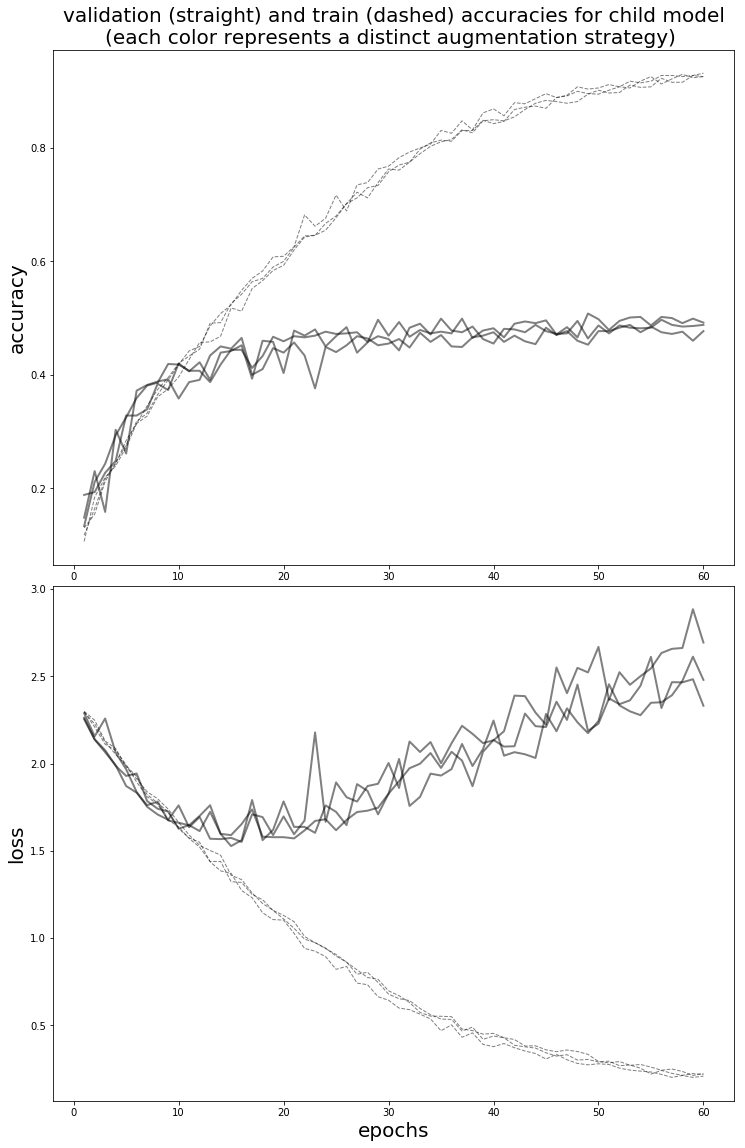

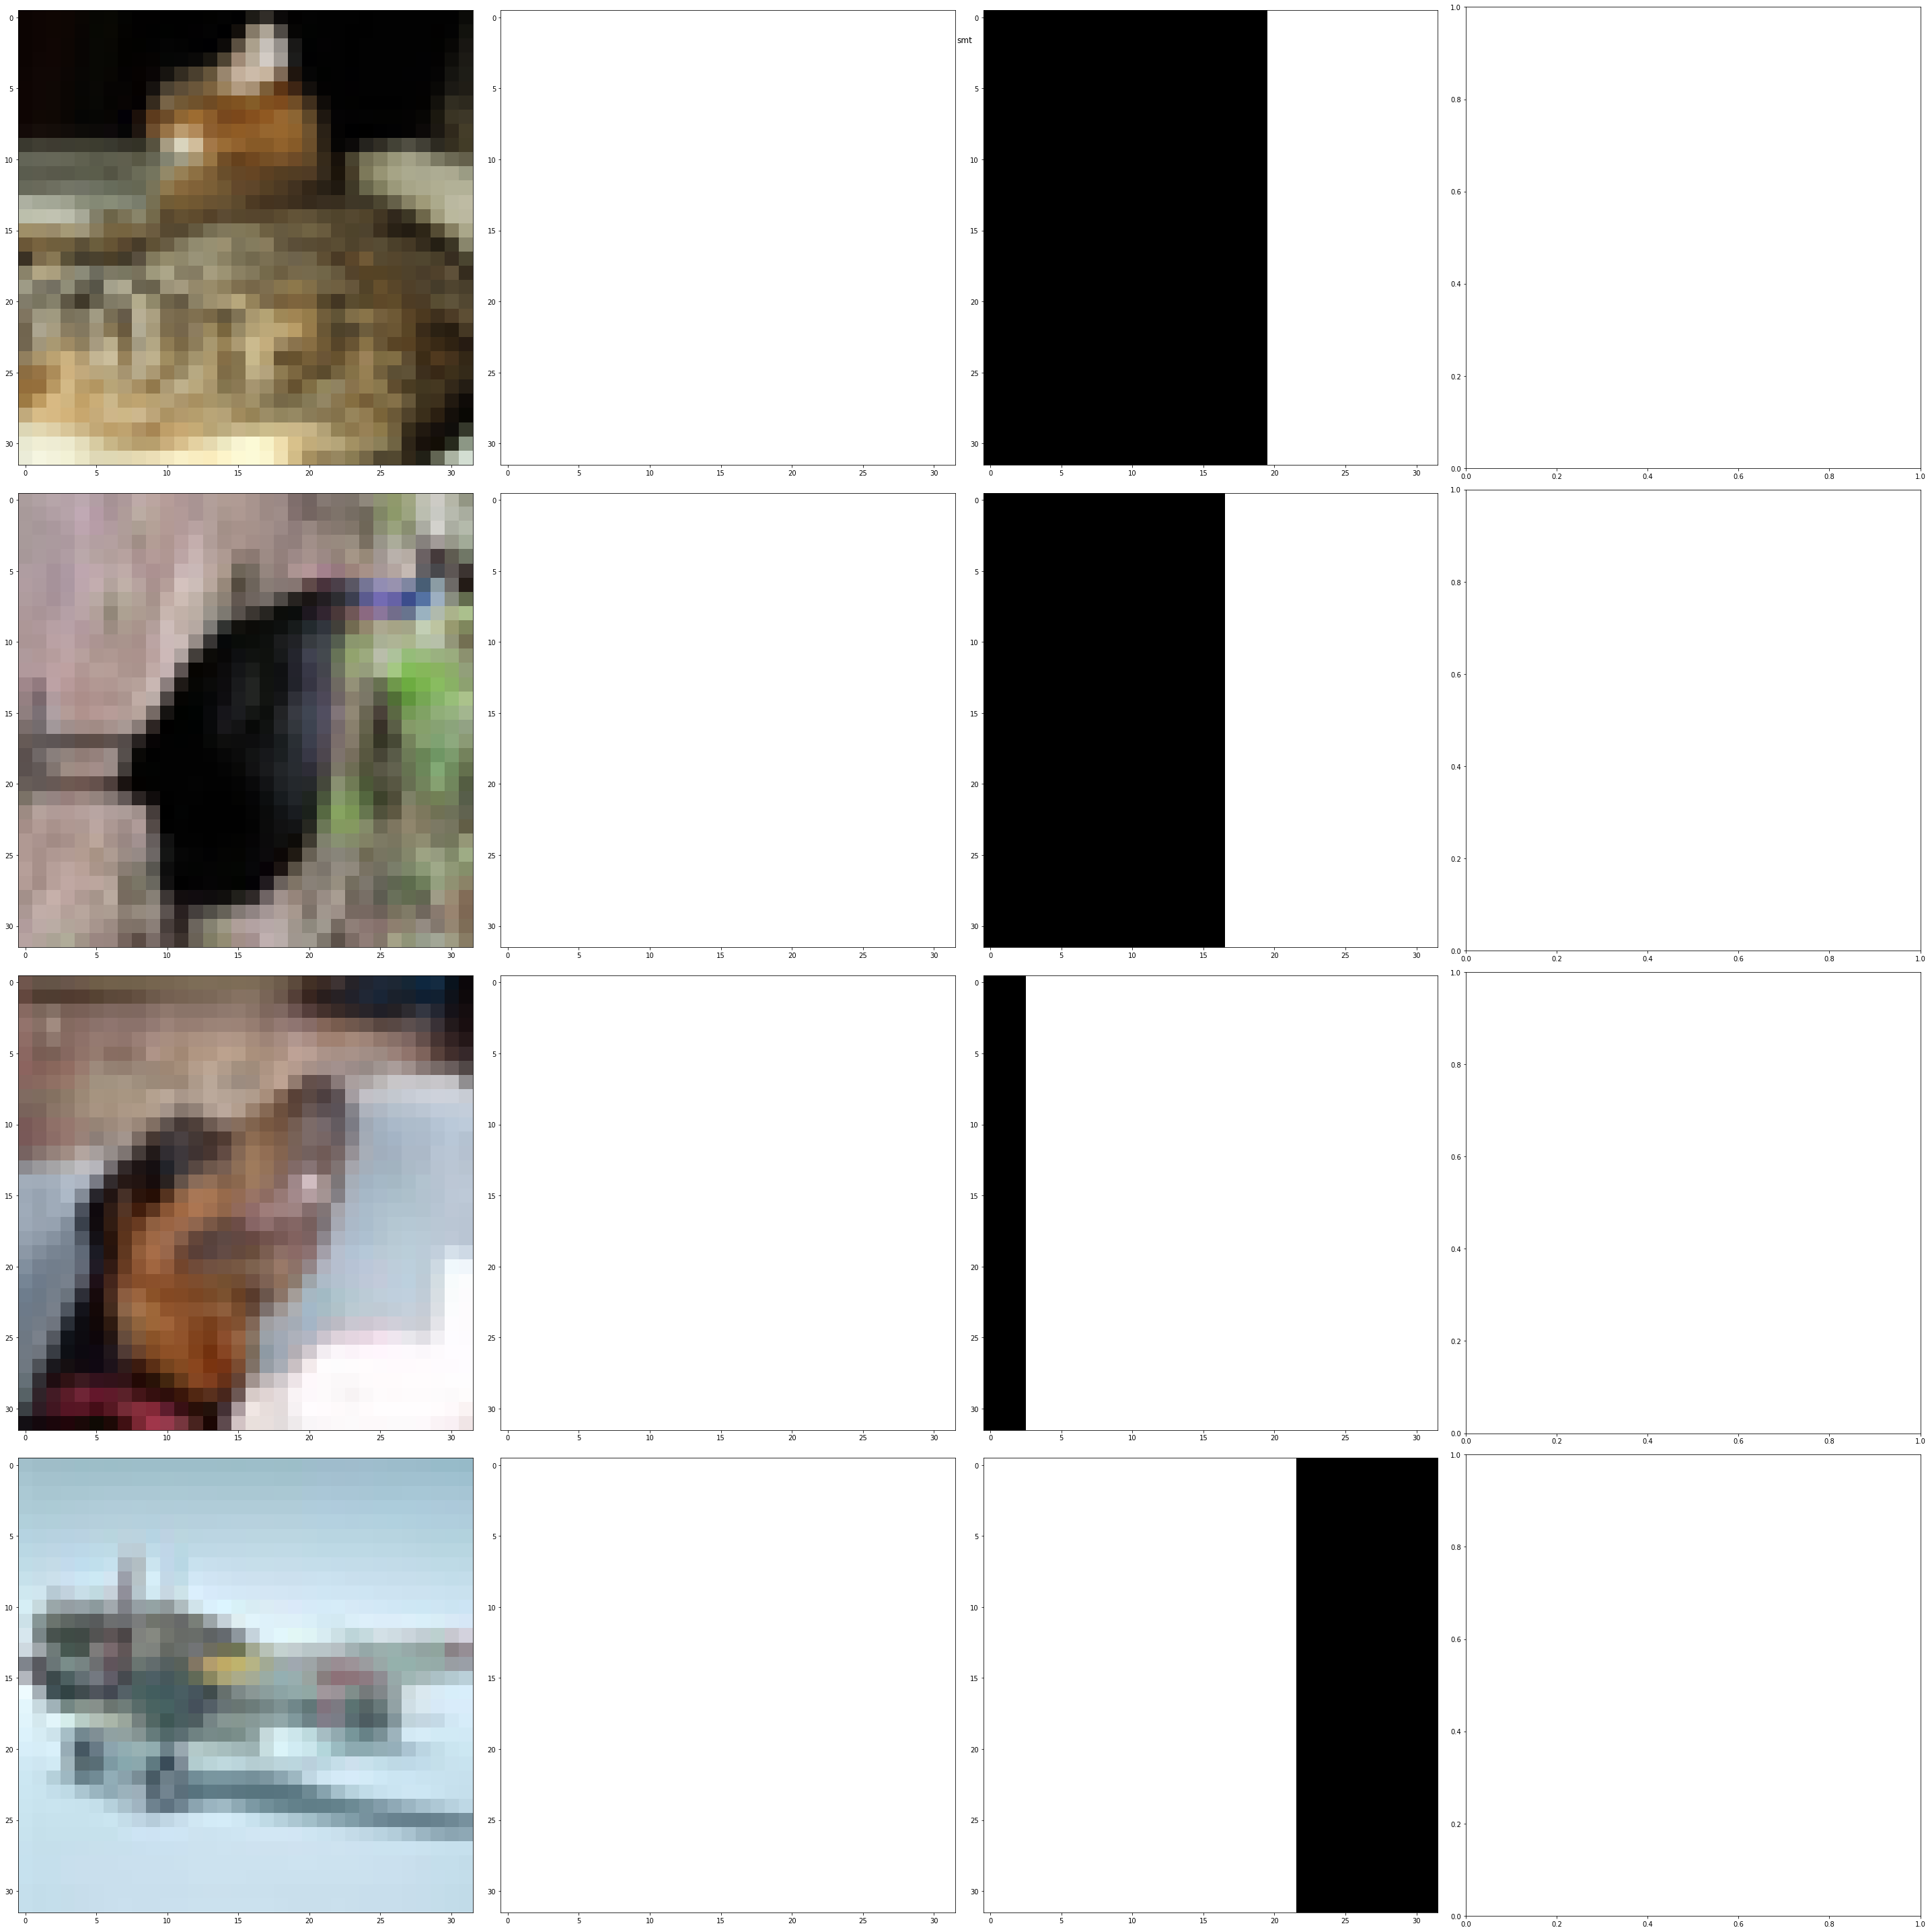

<Figure size 144x144 with 0 Axes>

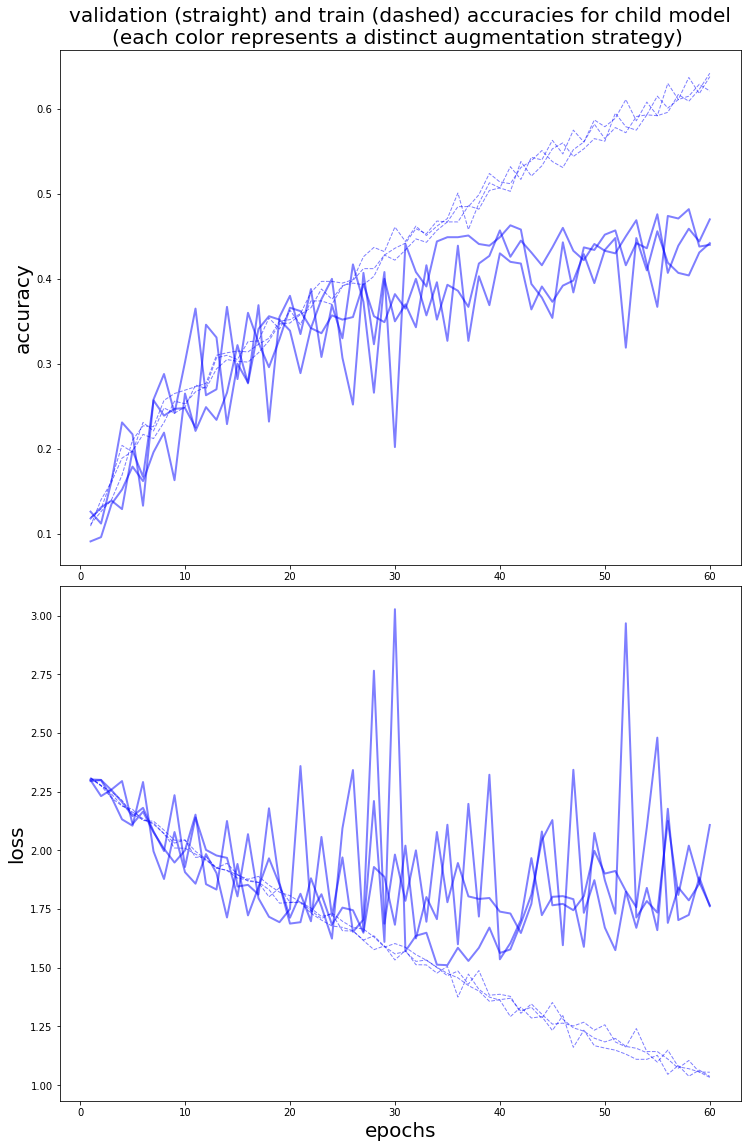

In [53]:
for i in non_overfitting_exp_df.drop_duplicates("trial_no").sort_values("reward", ascending=False).trial_no.values[:5]:
    print ("trial_no:",i)
    display_augmentation_by_steps(i, non_overfitting_exp_df, data, nrows=4)
    # display_augmentation_by_trial_no(i, non_overfitting_exp_df, data, nrows=2, ncols=4)
    plt.figure(figsize=(2,2))
    plot_exp_lines(exp_df[exp_df["trial_no"]==i])

In [57]:
top20_df = non_overfitting_exp_df.drop_duplicates("trial_no").sort_values("reward",ascending=False)[:20]
top20_df

acc   loss  val_acc  val_loss  trial_no                  aug1_type  \
22860  0.122  2.294    0.113     2.282       128                       crop   
70200  0.105  2.319    0.094     2.302       391                       crop   
52020  0.107  2.318    0.107     2.300       290                      shear   
7920   0.130  2.299    0.148     2.288        45                   brighten   
8280   0.111  2.308    0.126     2.295        47                        fog   
85860  0.116  2.318    0.102     2.300       478                     rotate   
79380  0.119  2.309    0.104     2.302       442                    dropout   
45720  0.109  2.316    0.105     2.302       255             gamma-contrast   
5040   0.116  2.305    0.130     2.299        29                     rotate   
89460  0.110  2.314    0.098     2.299       498                    dropout   
62640  0.110  2.307    0.098     2.296       349                       crop   
64080  0.114  2.314    0.114     2.299       357                       crop   
86580  0.110  2.313    0.119     2.298       482                   brighten   
86940  0.118  2.318    0.129     2.300       484                   brighten   
7020   0.123  2.299    0.155     2.273        40                    dropout   
83520  0.118  2.322    0.088     2.302       465                    sharpen   
21420  0.118  2.302    0.105     2.296       120                       crop   
14220  0.115  2.311    0.115     2.301        80             gamma-contrast   
13860  0.110  2.311    0.097     2.300        78             gamma-contrast   
26280  0.107  2.314    0.095     2.301       147  add-to-hue-and-saturation   

       aug1_magnitude                  aug2_type  aug2_magnitude  portion  \
22860           0.635                       crop           0.085    0.988   
70200           0.327                     clouds           0.786    0.858   
52020           0.901                translate-y           0.747    0.415   
7920            0.003                   brighten           0.952    0.984   
8280            0.003                translate-x           0.787    0.483   
85860           0.547                     clouds           0.992    0.992   
79380           0.129                        fog           0.975    0.077   
45720           0.127                       crop           0.863    0.921   
5040            0.097  add-to-hue-and-saturation           0.260    0.537   
89460           0.276                        fog           0.070    0.090   
62640           0.814             gamma-contrast           0.951    0.989   
64080           0.912                   brighten           0.336    0.795   
86580           0.087                     rotate           0.992    0.995   
86940           0.472                     clouds           0.975    0.989   
7020            0.002                      shear           0.728    0.967   
83520           0.125                     invert           0.920    0.820   
21420           0.330                   brighten           0.066    0.588   
14220           0.242                     emboss           0.075    0.530   
13860           0.288                   brighten           0.973    0.554   
26280           0.834                   brighten           0.135    0.995   

       sample_no  reward  epoch  acc_overfit  total_acc_overfit  
22860          1   0.480    0.0        0.009              0.974  
70200          1   0.474    0.0        0.011              1.093  
52020          1   0.455    0.0        0.000              0.596  
7920           1   0.450    0.0       -0.018              2.221  
8280           1   0.448    0.0       -0.015              0.556  
85860          1   0.447    0.0        0.014              0.110  
79380          1   0.447    0.0        0.015              0.072  
45720          1   0.447    0.0        0.004              0.291  
5040           1   0.441    0.0       -0.014              0.714  
89460          1   0.439    0.0        0.012              1.609  
62640

In [59]:
top20_df = exp_df.drop_duplicates("trial_no").sort_values("reward",ascending=False)[:20]
top20_df.to_csv("../../top20_policies.csv", index=False)
top20_df

acc   loss  val_acc  val_loss  trial_no                  aug1_type  \
65700  0.120  2.308    0.144     2.301       366                       crop   
70560  0.103  2.319    0.102     2.302       393             gamma-contrast   
28800  0.112  2.310    0.124     2.297       161                       crop   
47160  0.119  2.312    0.134     2.301       263                       crop   
32580  0.118  2.304    0.137     2.291       182                       crop   
43560  0.113  2.320    0.118     2.303       243             gamma-contrast   
31860  0.109  2.307    0.114     2.295       178                       crop   
46440  0.113  2.307    0.099     2.296       259                       crop   
30600  0.111  2.311    0.151     2.299       171                       crop   
39600  0.106  2.307    0.096     2.301       221             gamma-contrast   
50220  0.112  2.305    0.089     2.301       280                       crop   
13140  0.109  2.315    0.153     2.299        74             gamma-contrast   
58320  0.109  2.315    0.121     2.300       325  add-to-hue-and-saturation   
48060  0.105  2.322    0.115     2.302       268                       crop   
16200  0.104  2.317    0.148     2.302        91             gamma-contrast   
45900  0.110  2.308    0.113     2.298       256                       crop   
19440  0.109  2.319    0.101     2.304       109             gamma-contrast   
10080  0.117  2.313    0.097     2.302        57             gamma-contrast   
50760  0.094  2.316    0.105     2.300       283                       crop   
55800  0.117  2.310    0.089     2.301       311  add-to-hue-and-saturation   

       aug1_magnitude                  aug2_type  aug2_magnitude  portion  \
65700           0.764                     emboss           0.006    0.760   
70560           0.000  add-to-hue-and-saturation           0.827    0.902   
28800           0.970  add-to-hue-and-saturation           0.904    0.639   
47160           0.902              gaussian-blur           0.858    0.831   
32580           0.910              gaussian-blur           0.963    0.903   
43560           0.144                     rotate           0.861    0.713   
31860           0.815                       crop           0.961    0.764   
46440           0.982             gamma-contrast           0.856    0.993   
30600           0.904                     clouds           0.906    0.781   
39600           0.005                     invert           0.357    0.992   
50220           0.813                     clouds           0.986    0.793   
13140           0.008                        fog           0.250    0.528   
58320           0.465              gaussian-blur           0.133    0.962   
48060           0.816             gamma-contrast           0.016    0.781   
16200           0.062    additive-gaussian-noise           0.877    0.898   
45900           0.903                   brighten           0.545    0.596   
19440           0.002                   brighten           0.612    0.938   
10080           0.013                     rotate           0.744    0.430   
50760           0.888                     invert           0.022    0.805   
55800           0.136              gaussian-blur           0.965    0.838   

       sample_no  reward  epoch  acc_overfit  
65700          1   0.500    0.0       -0.024  
70560          1   0.500    0.0        0.001  
28800          1   0.497    0.0       -0.012  
47160          1   0.497    0.0       -0.015  
32580          1   0.496    0.0       -0.019  
43560          1   0.495    0.0       -0.005  
31860          1   0.492    0.0       -0.005  
46440          1   0.492    0.0        0.014  
30600          1   0.491    0.0       -0.040  
39600          1   0.490    0.0        0.010  
50220          1   0.488    0.0        0.023  
13140          1   0.488    0.0       -0.044  
58320          1   0.487    0.0       -0.012  
48060          1   0.487    0.0       -0.010  
16200          1   0.486  

# Top-3 nonoverfitting policies curves

trial_no aug1_type  aug1_magnitude    aug2_type  aug2_magnitude  portion  \
0       128      crop           0.635         crop           0.085    0.988   
2       391      crop           0.327       clouds           0.786    0.858   
1       290     shear           0.901  translate-y           0.747    0.415   

   reward  
0   0.480  
2   0.474  
1   0.455

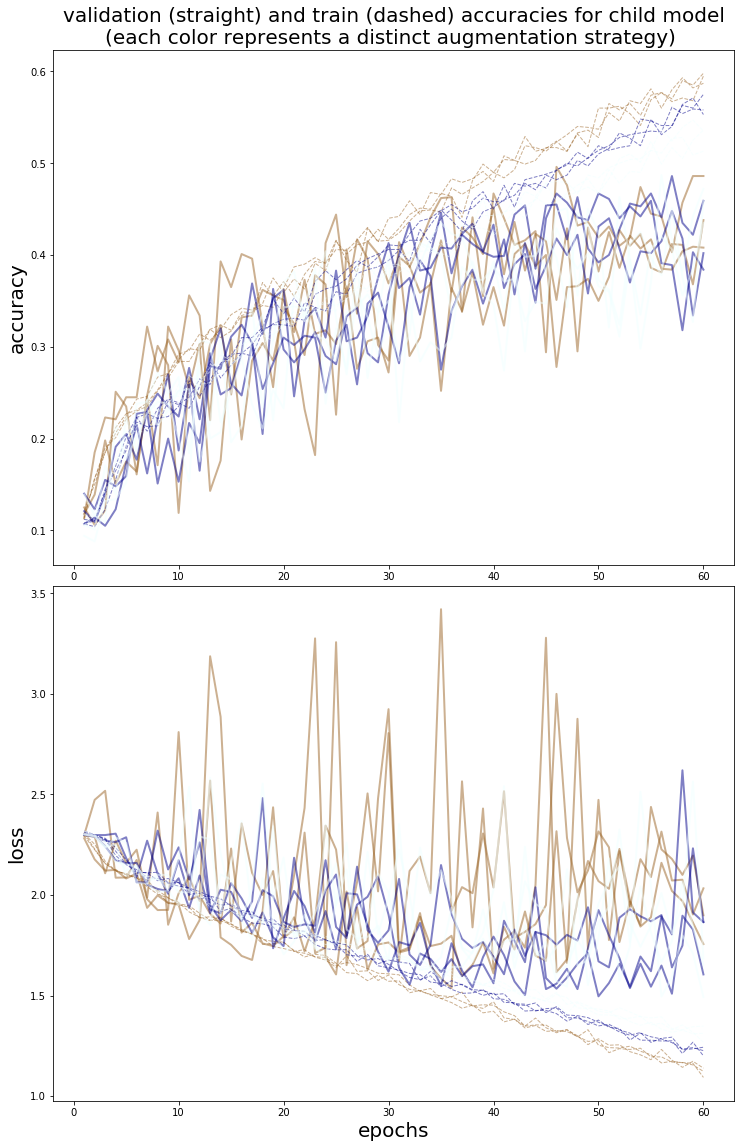

In [55]:
top3_non_overfitting = (non_overfitting_exp_df.drop_duplicates("trial_no")
                            .sort_values("reward",ascending=False)["trial_no"]
                            .values[:3]
                       )

plot_exp_lines(non_overfitting_exp_df[non_overfitting_exp_df["trial_no"].isin(top3_non_overfitting)])

In [ ]:
np.array_split(np.arange(8) , 20)

In [ ]:
rowList=[]
for x in range(len(exp_df["trial_no"].unique())):
    ind = x*50+49
    reward = exp_df.iloc[ind]["reward"]
    val_acc = exp_df.iloc[ind]["val_acc"]
    rowList.append([reward, val_acc])
rv_df = pd.DataFrame(rowList, columns=["reward","val_acc"])
rv_df.head()

In [ ]:
plt.scatter(rv_df["reward"],rv_df["val_acc"])